# Random Walks en Alianzas de Aerolíneas

## Paquetes

In [1]:
using StatsBase

In [2]:
using DelimitedFiles

In [1]:
using Plots

In [4]:
#No cargar
using Plotly

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12978114249384415933\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8966808575705919710\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/d8f38831b0d0bb291a6a5e63a8ad83a7ec920338-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-12978114249384415933\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

In [ ]:
using FreqTables

In [ ]:
using StatsPlots

In [4]:
using RandomNumbers

In [119]:
using RandomNumbers.Xorshifts

In [ ]:
using Documenter

In [ ]:
Pkg.add("Gadfly")

In [5]:
cd("$(homedir())/Documents/UNAM/Tesis_Lic")

## Funciones

In [6]:
"""
    n_in_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_in_degree (generic function with 1 method)

In [7]:
"""
in_degree(M)

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function in_degree(M::Array)
    grados_entrada = sum(M, dims = 2)
end

in_degree (generic function with 1 method)

In [ ]:

function in_degreeP(M::Array)
    grados = Int64[]
    grados_entrada = sum(M, dims = 2)
    for i in 1:length(grados_entrada)
        push!(grados, grados_entrada[i])
    end
    grados
end

In [8]:
"""
n_out_degree(M, n)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_out_degree (generic function with 1 method)

In [8]:
"""
out_degree(M)

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function out_degree(M::Array)
    grados_salida = sum(M, dims = 1)
end

out_degree (generic function with 1 method)

In [9]:

function out_degreeP(M::Array)
    grados = Int64[]
    grados_salida = sum(M, dims = 1)
    for i in 1:length(grados_salida)
        push!(grados, grados_salida[i])
    end
    grados
end

out_degreeP (generic function with 1 method)

In [10]:
"""
degree(M)

Función que obtiene el grado de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve el grado de la red, el cual es representado por un valor numérico de tipo Float64

## Implementación

### Ejemplos
"""

function degree(M::Array)
    
    grado_entrada = degree_in(M)
    
    grado_red = sum(grado_entrada) / length(grado_entrada) #Grado de la red, promedio de los grados
end

degree (generic function with 1 method)

In [10]:
"""
Función de distribución de grado de entrada
"""


function distrib_in_degree(M::Array)
    x = in_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_in_degree (generic function with 1 method)

In [ ]:
#Hacer una función analize_distribution que nos dé el diccionario de frecuencias 

In [11]:
"""
Función de distribución de grado de salida
"""

function distrib_out_degree(M::Array)
    x = out_degree(M)
    degree_count = counts(x)
    return degree_count
end

distrib_out_degree (generic function with 1 method)

In [ ]:
"""
Función de distribución
"""

function distrib_degree(M::Array)
    x = degree(M)
    distribucion = Int64[]
    
    for i in 1:length(x)
        degree_count = count(x == i, x)
        push!(distribucion, degree_count)
    end
    distribucion
end

In [ ]:
#Función que plotee la distribución
function plot_distrib
    

In [10]:
"""
La función r_walks tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
f, nodo inicial de tipo Int64
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz, el cual tiene igual probabilidad de avanzar 
hacia cualquiera de sus vecinos.
Regresa un arreglo que contiene todas las trayectorias que tomó el caminante aleatorio.
"""

function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)
    nodos = size(M, 1) #aeropuertos  
    paths = zeros(Int64, (iter, steps + 1))
    s = f

    for i in 1:iter
        paths[i, 1] = f
        for p in 1:steps 
            row = M[s, :] #Renglón correspondiente al nodo s
            vecinos = findall(x -> x != 0, row)
            if vecinos == []
                break
            else
                a = sample(vecinos) #sample(Xoroshiro128Plus(0x1234567890abcdef), vecinos) 
                paths[i, p + 1] = a
            s = a
            end
        end
        s = f
    end
    return paths 
end

r_walks (generic function with 1 method)

In [11]:
"""
La función random_walk tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz con igual probabilidad de avanzar 
hacia cualquiera de sus vecinos. Esta función recorre todos los nodos de la red como
nodos iniciales y sobre ellos itera para obtener el número de caminos que se le pidió.
Regresa un arreglo que contiene arreglos asociados a todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""

function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64) #Debo agregarle el nodo inicial al inicio del path
    random_walks = []
    nodos = size(M, 1)
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    random_walks
end

random_walk (generic function with 1 method)

In [12]:
"""
La función walk_length tiene como parámetros:
RW, arreglo de arreglos de tipo Array{Any,1} que corresponde al arreglo de caminatas aleatorias.
La función regresa un arreglo de arreglos que contiene las longitudes de todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""

function walk_length(W)
    
    longitudes = Array[]
    c = 0
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v
        #@show i
        for j in 1:s
            #@show j
            for k in 1:t
                #@show k
                
                if W[i][j, :][k] != 0 #W[i][j, :] #renglón a analizar
                    c += 1 
                else
                    break
                end
                
            end
            longz[j] = c - 1
            #@show longz[j]
            c = 0
            
        end
        push!(longitudes, longz)
        #@show longitudes
        longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    end
    return longitudes
end

walk_length (generic function with 1 method)

In [13]:
"""
La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la 
función walk_length). 
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de 
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""

function walk_av_length(W)
    
    proms = []
    wlength = walk_length(W)
    
    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    proms
end

walk_av_length (generic function with 1 method)

In [14]:
"""
Función que saca el promedio de longitud de caminata en la capa
"""

function walk_layer_length(W)
    
    x = walk_av_length(W)
    av = mean(x)
    return av
end

walk_layer_length (generic function with 1 method)

In [15]:
"""
La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""

function nodos_visitados(W)
    
    
    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos, no necesario
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []
    
    for i in 1:v        
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end
        push!(cobert, visit)
        visit = []
    end
    return cobert
end

nodos_visitados (generic function with 1 method)

In [18]:
function nodos_visitados(W)
    x = nodos_visitados_n(W)
    cobertura = []
    

LoadError: syntax: incomplete: "function" at none:1 requires end

In [ ]:
"""
Regresa los nodos que visitó y su frecuencia para cada iteración
??????????????????
"""

function frecuencia_visitas_it(W::Array)
    
    v = length(W)
    s = size(W[1], 1)
    t = size(W[1], 2)
    x = nodos_visitados(W)
    frecuencias = []
    frec = []

    for j in 1:v
        for k in 1:s
            u = counts(grado_entrada_SA[k], 1:length(grado_entrada_SA))    
            push!(frec, u)
        end
    push!(frecuencias, frec)
    end
    frecuencias
end

In [17]:
counts([3, 4, 1, 2, 2, 1, 3, 1, 6, 3], 1:11)

11-element Array{Int64,1}:
 3
 2
 3
 1
 0
 1
 0
 0
 0
 0
 0

In [22]:
counts([3, 4, 1, 2, 2, 1, 3, 1, 6, 3, 0], 1:11)

11-element Array{Int64,1}:
 3
 2
 3
 1
 0
 1
 0
 0
 0
 0
 0

In [16]:
"""
La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""

function cobertura(W) 
    
    cobert = []
    
    v = length(W) #tamaño de la matriz, número de nodos
    x = nodos_visitados(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            l = length(x[i][j])
            longz[j] = l
        end
        push!(cobert, longz)
        longz = zeros(Int64, s)
    end
    return cobert
end


cobertura (generic function with 1 method)

In [17]:
"""
n_cobertura_av con parámetro W (caminatas) da el promedio de la caminata por nodo inicial. 
"""

function n_cobertura_av(W) #Esta es la importante
    
    longitud = []
    x = cobertura(W)
    
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end
    longitud
end


n_cobertura_av (generic function with 1 method)

In [18]:
"""
cobertura_av da el promedio de la longitud de las caminatas para todos los nodos, como un número.
"""

function cobertura_av(W)
    x = n_cobertura_av(W)
    promedio = mean(x)
    return promedio
end


cobertura_av (generic function with 1 method)

In [19]:
"""
Da la longitud máxima de cada iteración de cada nodo inicial.
"""

function max_length(W)
    max = []
    x = cobertura(W)
    for i in 1:length(x)
        m = maximum(x[i])
        push!(max, m)
    end
    max
end


max_length (generic function with 1 method)

In [20]:
"""
Da la longitud máxima total.
"""

function Max_length(W)
    x = max_length(W)
    m = maximum(x)
    return m
end


Max_length (generic function with 1 method)

In [21]:
"""
Regresa el promedio de la longitud máxima de cada nodo inicial.
"""

function av_max_length(W)
    x = max_length(W)
    prom = mean(x)
    return prom
end


av_max_length (generic function with 1 method)

In [22]:
"""
Da la longitud mínima de cada iteración de cada nodo inicial.
"""

function min_length(W)
    min = []
    x = cobertura(W)
    for i in 1:length(x)
        m = minimum(x[i])
        push!(min, m)
    end
    min
end


min_length (generic function with 1 method)

In [23]:
"""
Da la longitud mínima total.
"""

function Min_length(W)
    x = min_length(W)
    m = minimum(x)
    return m
end


Min_length (generic function with 1 method)

In [24]:
"""
Regresa el promedio de la longitud mínima de cada nodo inicial.
"""

function av_min_length(W)
    x = min_length(W)
    prom = mean(x)
    return prom
end


av_min_length (generic function with 1 method)

In [276]:
"""
Atractor regresa un arreglo de arreglos que contiene los nodos en los que cae cada caminata y ya no puede salir.
"""

function atractor(W) 
    x = nodos_visitados(W)
    atractores = [] #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos +1
    atract = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            if x[i][j, :][end][end] == 0
                at = x[i][j, :][end][end - 1]
                atract[j] = at
            else
                atract[j] = 0
            end
        end
        push!(atractores, atract)
        atract = zeros(Int64, s)
    end
    return atractores
end

atractor (generic function with 1 method)

In [301]:
"""
Función que da un diccionario con frecuencias
"""

function freq_atractor(W)
    freqs = []
    x = atractor(W)
    v = length(W)
    
    for i in 1:v
        frec = countmap(x[i])
        push!(freqs, frec)
    end
    freqs
end

freq_atractor (generic function with 1 method)

In [335]:
"""
Función que saca la distribución de los atractores para toda la capa
"""
function distrib_atractor(W)
    x = freq_atractor(W)
    frec_total = zeros(Int64, length(W))
    frec_nodo = zeros(Int64, length(W))

    for i in 1:length(W)
        for j in 1:length(W)
            frec_nodo[j] = get(x[i], j, 0)
        end
        frec_total += frec_nodo
    end
    
    return frec_total
end

distrib_atractor

In [281]:
"""
Función que calcula el promedio de atractores por nodo
"""

function av_n_atractor(W) 
    
    x = atractor(W)
    atractores_prom = [] #Arreglo vacío que contenga a los atractores
    v = length(W) #tamaño de la matriz, número de nodos

    for i in 1:v        
        av = mean(x[i])
        push!(atractores_prom, av)
    end
    atractores_prom
end

av_n_atractor (generic function with 1 method)

## Datos

In [22]:
m17 = readdlm("data/multi_17_du.csv", ',');

In [23]:
nom_m17 = m17[1, :];
nombres_m17 = nom_m17[2:end]

3189-element Array{Any,1}:
 "AER"
 "ASF"
 "CEK"
 "DME"
 "EGO"
 "GYD"
 "KGD"
 "KZN"
 "LED"
 "MRV"
 "NBC"
 "NJC"
 "NUX"
 ⋮    
 "LPS"
 "ORX"
 "BVS"
 "MTE"
 "DLZ"
 "UII"
 "ZBF"
 "CMP"
 "BSS"
 "AEX"
 "GCK"
 "MGM"

In [24]:
multi17 = m17[2:end, :];
multi17 = multi17[:, 2:end];

In [25]:
multiplex = convert(Array{Int64,2}, multi17)

3189×3189 Array{Int64,2}:
 0  0  0  1  0  0  0  1  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  0  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  1  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  1  1  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  0  1  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  1  0  1  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  1  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0

In [19]:
mSA = readdlm("data/multi_SA_du.csv", ',');

In [20]:
nom_SA = mSA[1, :];
nombres_SA = nom_SA[2:end]

934-element Array{Any,1}:
 "AOK"
 "ARN"
 "ATH"
 "AUH"
 "AXD"
 "BCN"
 "BEG"
 "BOD"
 "BRU"
 "BUD"
 "CAI"
 "CDG"
 "CFU"
 ⋮    
 "STL"
 "STT"
 "SYR"
 "TKK"
 "YAP"
 "HSN"
 "JUZ"
 "YIC"
 "GLF"
 "TMU"
 "GET"
 "PWM"

In [21]:
multiSA = mSA[2:end, :];
multiSA = multiSA[:, 2:end];

In [22]:
multiplexSA = convert(Array{Int64,2}, multiSA)

934×934 Array{Int64,2}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  1  0  0  0  1  1  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  0  1  1  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  

In [30]:
mOW = readdlm("data/multi_OW_du.csv", ',');

In [31]:
nom_OW = mOW[1, :];
nombres_OW = nom_OW[2:end]

698-element Array{Any,1}:
 "EZE"
 "MIA"
 "PUJ"
 "ABE"
 "ABQ"
 "AGS"
 "ALB"
 "AMS"
 "ANC"
 "ANU"
 "ASU"
 "ATH"
 "ATL"
 ⋮    
 "CRW"
 "LEX"
 "MOB"
 "PWM"
 "TYS"
 "VPS"
 "KEM"
 "AAL"
 "SLA"
 "TUC"
 "IQT"
 "NJC"

In [32]:
multiOW = mOW[2:end, :];
multiOW = multiOW[:, 2:end];

In [33]:
multiplexOW = convert(Array{Int64,2}, multiOW)

698×698 Array{Int64,2}:
 0  1  1  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  1  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  

In [34]:
mST = readdlm("data/multi_ST_du.csv", ',');

In [35]:
nom_ST = mST[1, :];
nombres_ST = nom_ST[2:end]

900-element Array{Any,1}:
 "AGF"
 "AJA"
 "AMS"
 "AUR"
 "BES"
 "BIA"
 "BIQ"
 "BLQ"
 "BOD"
 "BRU"
 "BVE"
 "CFE"
 "CFR"
 ⋮    
 "VCL"
 "VDH"
 "VII"
 "VKG"
 "ANR"
 "CWL"
 "DOL"
 "JER"
 "AOI"
 "PSA"
 "PWM"
 "ESB"

In [36]:
multiST = mST[2:end, :];
multiST = multiST[:, 2:end];

In [37]:
multiplexST = convert(Array{Int64,2}, multiST)

900×900 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

## Distribuciones de grado

### Multiplex

#### Grado de entrada

In [42]:
grado_entrada_M = in_degree(multiplex)

3189×1 Array{Int64,2}:
  17
   7
  14
 187
   9
  39
  10
  21
 110
  16
   7
   9
  10
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0

In [49]:
hu=counts([3, 4, 0, 2, 2, 1, 3, 1, 6, 3]) #Cuántos grados de entrada desde 0:el q sea tengo de cada uno

7-element Array{Int64,1}:
 1
 2
 2
 3
 1
 0
 1

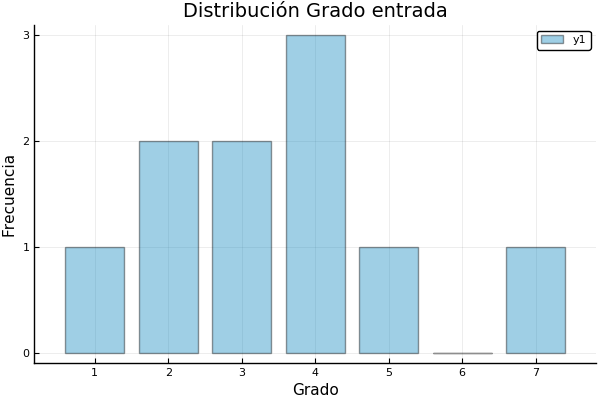

In [57]:
bar(hu, color="#0f87bf",alpha=0.4, title="Distribución Grado entrada", xlabel="Grado", ylabel="Frecuencia")

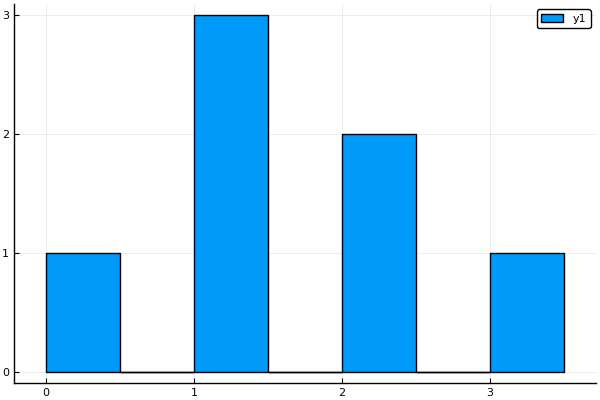

In [54]:
histogram(hu, nb=10)

In [73]:
#¿Cuántas frecuencias son i?
count(i->(i==3), hu)

1

In [68]:
distrib_in_M = distrib_in_degree(multiplex)

238-element Array{Int64,1}:
  23
 894
 588
 324
 227
 138
  92
  87
  74
  62
  37
  29
  40
   ⋮
   0
   1
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

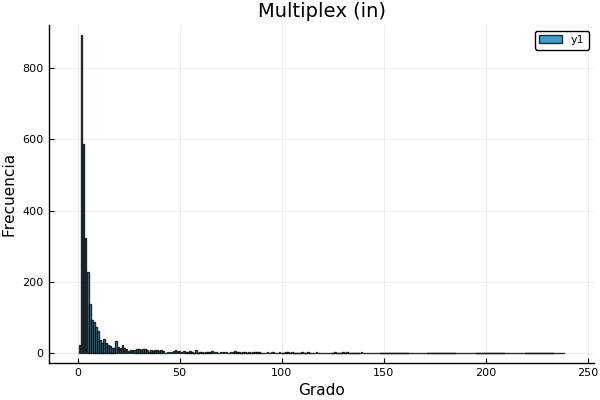

In [105]:
pyplot()
d_in_M = bar(distrib_in_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex (in)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

#### Grado de salida

In [ ]:
grado_salida_M = out_degree(multiplex)

In [70]:
distrib_out_M = distrib_out_degree(multiplex)

234-element Array{Int64,1}:
  10
 908
 579
 333
 216
 141
  99
  85
  71
  68
  36
  33
  37
   ⋮
   0
   0
   0
   1
   0
   0
   0
   0
   1
   0
   0
   1

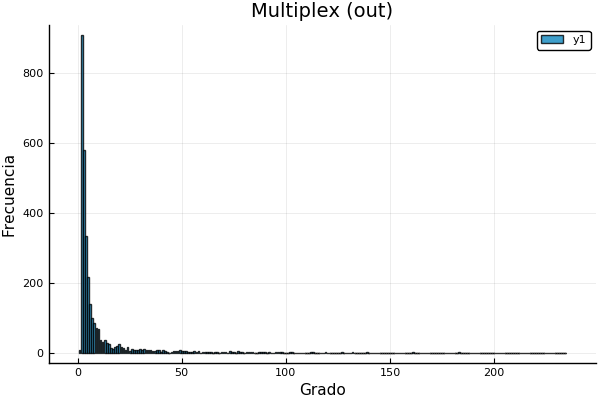

In [106]:
pyplot()
d_out_M = bar(distrib_out_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex (out)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

### Star Alliance

#### Grado de entrada

In [73]:
grado_entrada_SA = in_degree(multiplexSA)

934×1 Array{Int64,2}:
  3
 66
 69
 10
  1
 21
  8
  1
 77
 11
 71
 38
  2
  ⋮
  1
  3
  1
  2
  2
  1
  1
  2
  0
  0
  0
  0

In [72]:
distrib_in_SA = distrib_in_degree(multiplexSA)

219-element Array{Int64,1}:
   4
 361
 142
  88
  53
  51
  28
  28
  30
  10
   8
  10
   5
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

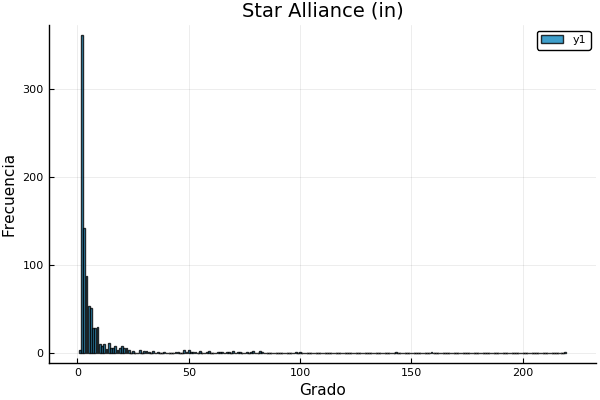

In [107]:
pyplot()
d_in_SA = bar(distrib_in_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance (in)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

In [ ]:
d = [1 3 2
     1 0 5
     0 0 0]

counts(in_degree(d))

In [61]:
in_c_SA = counts(grado_entrada_SA)

219-element Array{Int64,1}:
   4
 361
 142
  88
  53
  51
  28
  28
  30
  10
   8
  10
   5
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

In [62]:
i = 1
degree_count = count(grado_entrada_SA == i, grado_entrada_SA)

MethodError: MethodError: objects of type Bool are not callable

In [63]:
count(grado_entrada_SA == 1, grado_entrada_SA)

MethodError: MethodError: objects of type Bool are not callable

In [65]:
count(i->(4<=i<=6), [2,3,4,5,6]) #dime cuántas veces se cumple la condición i in [4,6] en el arreglo

3

In [ ]:
 x = in_degree(M)
frecuencia = Int64[]
    
    for i in 1:length(x)
        degree_count = count(x == i, x)
        push!(frecuencia, degree_count)
    end
    distribucion

In [64]:
#¿Cuántos nodos tienen grado de entrada cero?
count(i->(i==0), in_c_SA)

159

In [ ]:
plotly()
bar(in_c_SA)

In [ ]:
histogram(in_c_SA)

In [ ]:
sort(countmap(in_c_SA))

In [ ]:
n=nombres_SA;

#### Grado de salida

In [75]:
grado_salida_SA = out_degree(multiplexSA)

1×934 Array{Int64,2}:
 3  65  69  10  1  21  8  1  76  11  …  1  3  0  2  2  1  1  2  1  1  1  1

In [76]:
distrib_out_SA = distrib_out_degree(multiplexSA)

220-element Array{Int64,1}:
  11
 351
 150
  84
  58
  42
  32
  27
  31
   8
   8
  10
   6
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

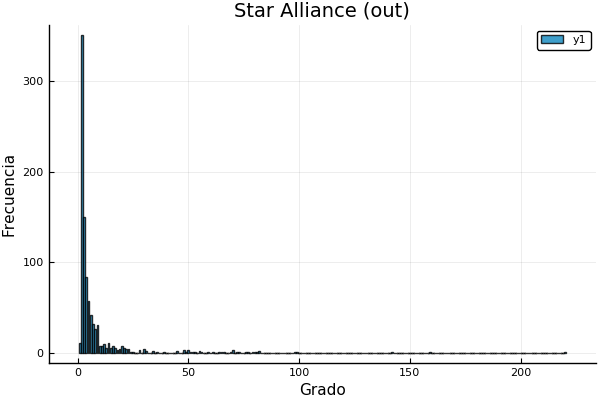

In [108]:
pyplot()
d_out_SA = bar(distrib_out_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance (out)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

In [ ]:
out_c_SA = counts(grado_salida_SA)

In [ ]:
bar(out_c_SA)

In [ ]:
histogram(out_c_SA)

In [ ]:
tt=sort(countmap(out_c_SA))

In [ ]:
#¿Cuántos nodos tienen grado de salida cero?
count(i->(i==0), out_c_SA)

### OneWorld

#### Grado de entrada

In [ ]:
grado_entrada_OW = in_degree(multiplexOW)

In [79]:
distrib_in_OW = distrib_in_degree(multiplexOW)

137-element Array{Int64,1}:
  12
 300
 125
  71
  37
  31
  25
  16
  18
   5
   6
   5
   2
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

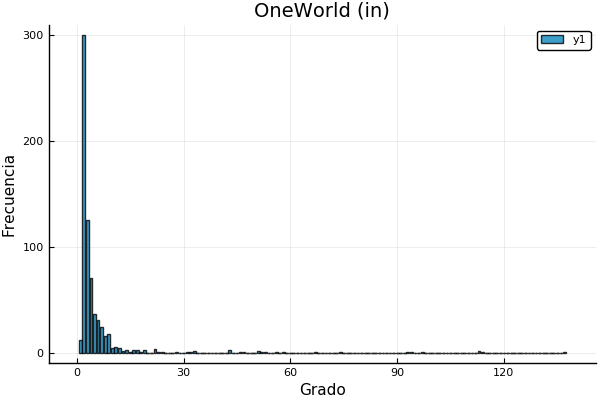

In [109]:
pyplot()
d_in_OW = bar(distrib_in_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld (in)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

#### Grado de Salida

In [82]:
distrib_out_OW = distrib_out_degree(multiplexOW)

137-element Array{Int64,1}:
   2
 305
 129
  76
  34
  34
  22
  17
  13
   8
   7
   4
   3
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   1

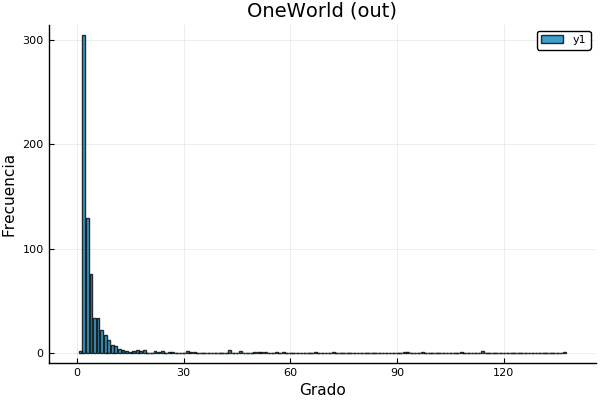

In [110]:
pyplot()
d_out_OW = bar(distrib_out_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld (out)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

### Sky Team

#### Grado de entrada

In [84]:
distrib_in_ST = distrib_in_degree(multiplexST);

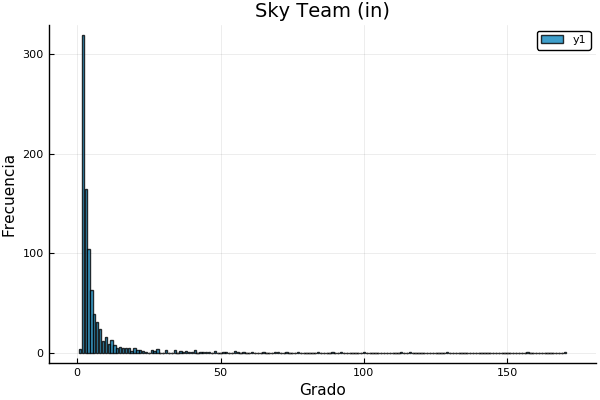

In [111]:
pyplot()
d_in_ST = bar(distrib_in_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team (in)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

#### Grado de salida

In [86]:
distrib_out_ST = distrib_out_degree(multiplexST);

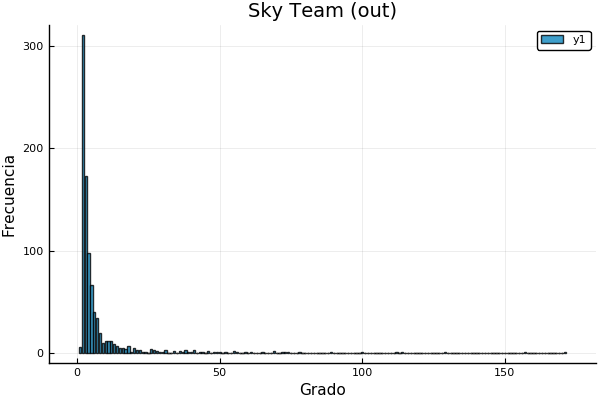

In [112]:
pyplot()
d_out_ST = bar(distrib_out_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team (out)", 
    xlabel="Grado", 
    ylabel="Frecuencia")

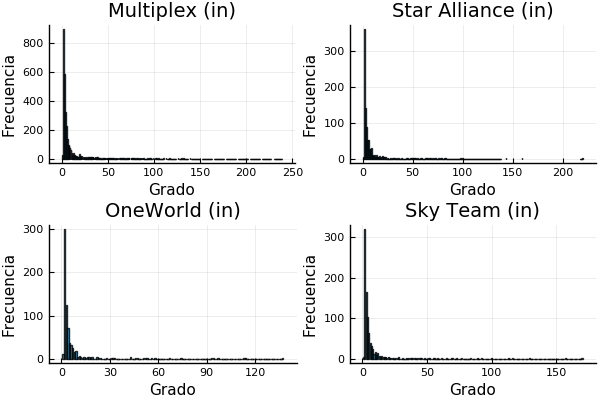

In [113]:
plot(d_in_M,d_in_SA,d_in_OW,d_in_ST,layout=(2,2),legend=false)

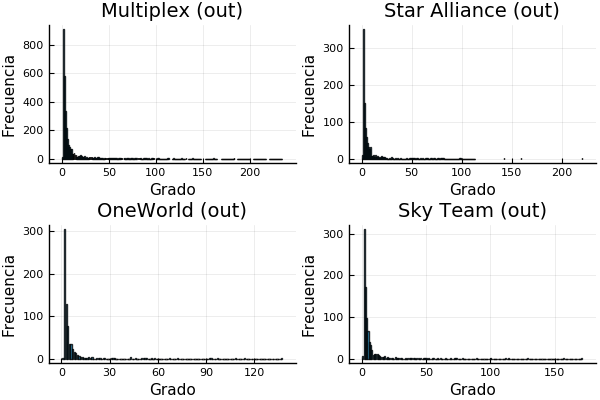

In [114]:
plot(d_out_M,d_out_SA,d_out_OW,d_out_ST,layout=(2,2),legend=false)

In [98]:
d_in = groupedbar(d_in_M,d_in_SA,d_in_OW,d_in_ST, color = "#0f87bf", alpha = 0.8,
    title="Distribución Grado de Entrada", 
    xlabel="Grado", 
    ylabel="Frecuencia")
#bar!(d_in_SA,color="#0f87bf",alpha=0.4)
#bar!(d_in_OW,color="#0f00bf",alpha=0.4)
#bar!(d_in_ST,color="#0f50bf",alpha=0.4)

UndefVarError: UndefVarError: groupedbar not defined

## Caminatas aleatorias

### Multiplex

In [132]:
caminata_M = @time random_walk(multiplex, 100, 10)

355.460216 seconds (37.57 M allocations: 77.372 GiB, 7.96% gc time)


3189-element Array{Any,1}:
 [1 727 … 1656 1937; 1 1531 … 1081 1049; … ; 1 837 … 337 218; 1 837 … 2284 2283] 
 [2 1829 … 220 476; 2 9 … 304 303; … ; 2 1829 … 44 1509; 2 9 … 93 578]           
 [3 682 … 1441 171; 3 14 … 333 1130; … ; 3 1752 … 2357 128; 3 8 … 0 0]           
 [4 469 … 1568 467; 4 574 … 311 260; … ; 4 1531 … 272 301; 4 1862 … 40 136]      
 [5 753 … 1854 3024; 5 8 … 1218 453; … ; 5 8 … 478 220; 5 753 … 1203 1179]       
 [6 1527 … 2638 1870; 6 1561 … 40 1357; … ; 6 723 … 289 1737; 6 684 … 715 1101]  
 [7 684 … 494 224; 7 594 … 1749 316; … ; 7 5 … 195 543; 7 684 … 178 656]         
 [8 5 … 1732 304; 8 725 … 179 164; … ; 8 724 … 224 493; 8 423 … 0 0]             
 [9 2734 … 1602 333; 9 453 … 199 898; … ; 9 997 … 633 649; 9 478 … 1530 434]     
 [10 4 … 963 393; 10 594 … 180 1629; … ; 10 352 … 1085 1089; 10 594 … 715 405]   
 [11 594 … 1229 60; 11 9 … 168 1656; … ; 11 6 … 37 1656; 11 4 … 2169 2171]       
 [12 2274 … 2666 2656; 12 349 … 305 317; … ; 12 2274 … 53 1049; 12 17 …

In [133]:
#Matriz que contiene 10 iteraciones de 100 pasos con nodo inicial 3
caminata_M[3]

10×101 Array{Int64,2}:
 3   682  1343  1872   183   182   424  …  1441   171  1438   566  1441   171
 3    14  1532  1008  1023   441  1348     2976   410  1450   395   333  1130
 3     9  1823  1831   723  1527   349     1568   444   494  1568  1077  1568
 3     9   278   175   305  1354   633     1008  1875  2614  2620  2240  1557
 3     9  1226    54  2424  1996  1362      433  1342   467   494   499   426
 3     8     4  1008   297  2321  2328  …  1130   467   338  1190   195  1184
 3   725   727   832   727    71  1226      544  1150  1173   467  1023    90
 3   478   753     9   591   594   439     1961  1098  1184   901   911  1170
 3  1752   319    14   425    53  1049      125  2237   128  2355  2357   128
 3     8   728   759  2742   594  2737        0     0     0     0     0     0

### Star Alliance

In [131]:
caminata_SA = @time random_walk(multiplexSA, 100, 10)

 22.046444 seconds (9.91 M allocations: 7.634 GiB, 10.67% gc time)


934-element Array{Any,1}:
 [1 3 … 384 327; 1 61 … 251 284; … ; 1 40 … 797 26; 1 40 … 930 119]             
 [2 576 … 48 19; 2 70 … 152 87; … ; 2 511 … 387 618; 2 20 … 521 578]            
 [3 31 … 12 528; 3 13 … 190 198; … ; 3 73 … 384 339; 3 16 … 213 184]            
 [4 11 … 45 9; 4 184 … 880 121; … ; 4 19 … 115 89; 4 290 … 15 62]               
 [5 3 … 89 76; 5 3 … 3 29; … ; 5 3 … 296 369; 5 3 … 436 263]                    
 [6 70 … 356 403; 6 54 … 162 135; … ; 6 96 … 279 276; 6 55 … 757 9]             
 [7 3 … 72 44; 7 73 … 748 721; … ; 7 19 … 183 184; 7 73 … 566 71]               
 [8 23 … 119 315; 8 23 … 656 224; … ; 8 23 … 176 232; 8 23 … 327 292]           
 [9 10 … 152 161; 9 479 … 279 260; … ; 9 558 … 390 119; 9 262 … 348 83]         
 [10 16 … 11 103; 10 73 … 87 879; … ; 10 16 … 235 45; 10 11 … 0 0]              
 [11 22 … 910 926; 11 12 … 436 260; … ; 11 176 … 73 16; 11 444 … 89 106]        
 [12 26 … 176 103; 12 73 … 553 859; … ; 12 566 … 520 2; 12 61 … 26 766]         
 [

### OneWorld

In [129]:
caminata_OW = @time random_walk(multiplexOW, 100, 10)

  7.178203 seconds (6.38 M allocations: 3.840 GiB, 13.07% gc time)


698-element Array{Any,1}:
 [1 85 … 0 0; 1 127 … 46 205; … ; 1 135 … 595 62; 1 127 … 172 168]     
 [2 183 … 62 606; 2 130 … 498 120; … ; 2 223 … 156 62; 2 36 … 2 216]   
 [3 46 … 120 532; 3 1 … 154 62; … ; 3 2 … 265 262; 3 177 … 0 0]        
 [4 177 … 0 0; 4 177 … 96 340; … ; 4 177 … 177 171; 4 177 … 653 25]    
 [5 61 … 161 160; 5 61 … 0 0; … ; 5 61 … 271 291; 5 61 … 388 120]      
 [6 46 … 0 0; 6 46 … 0 0; … ; 6 46 … 0 0; 6 46 … 250 178]              
 [7 46 … 519 505; 7 177 … 0 0; … ; 7 46 … 0 0; 7 46 … 0 0]             
 [8 265 … 172 46; 8 271 … 168 115; … ; 8 292 … 0 0; 8 271 … 151 2]     
 [9 178 … 261 642; 9 178 … 255 122; … ; 9 178 … 25 96; 9 178 … 255 401]
 [10 271 … 0 0; 10 218 … 2 210; … ; 10 3 … 139 168; 10 364 … 2 92]     
 [11 2 … 234 96; 11 1 … 328 127; … ; 11 1 … 504 207; 11 2 … 0 0]       
 [12 62 … 97 127; 12 127 … 121 61; … ; 12 62 … 0 0; 12 62 … 120 391]   
 [13 105 … 0 0; 13 105 … 374 96; … ; 13 2 … 542 375; 13 127 … 0 0]     
 ⋮                                    

### Sky Team

In [130]:
caminata_ST = @time random_walk(multiplexST, 100, 10)

 14.641460 seconds (9.03 M allocations: 6.768 GiB, 10.83% gc time)


900-element Array{Any,1}:
 [1 35 … 326 62; 1 15 … 380 455; … ; 1 35 … 446 73; 1 15 … 198 188]              
 [2 136 … 114 95; 2 11 … 95 98; … ; 2 37 … 74 38; 2 31 … 171 695]                
 [3 192 … 95 157; 3 113 … 0 0; … ; 3 126 … 718 509; 3 28 … 75 842]               
 [4 35 … 617 834; 4 35 … 0 0; … ; 4 35 … 663 50; 4 35 … 38 107]                  
 [5 28 … 0 0; 5 133 … 95 78; … ; 5 95 … 68 3; 5 33 … 469 380]                    
 [6 31 … 216 243; 6 33 … 161 72; … ; 6 31 … 95 134; 6 25 … 532 50]               
 [7 22 … 618 549; 7 33 … 0 0; … ; 7 25 … 0 0; 7 28 … 176 75]                     
 [8 188 … 458 123; 8 289 … 527 313; … ; 8 289 … 317 562; 8 286 … 0 0]            
 [9 25 … 123 73; 9 28 … 324 180; … ; 9 25 … 62 325; 9 25 … 73 448]               
 [10 18 … 0 0; 10 18 … 317 312; … ; 10 18 … 283 571; 10 123 … 384 73]            
 [11 133 … 249 261; 11 2 … 385 437; … ; 11 133 … 47 510; 11 2 … 549 291]         
 [12 35 … 3 38; 12 28 … 0 0; … ; 12 35 … 176 860; 12 95 … 18 302]       

## Longitud de todas las iteraciones de caminatas 

In [137]:
li_M = @time walk_length(caminata_M)

  3.384789 seconds (10.99 M allocations: 2.730 GiB, 7.27% gc time)


3189-element Array{Array,1}:
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 11] 
 [100, 100, 100, 100, 100, 100, 72, 100, 100, 100] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 98, 100, 100, 100, 100, 100, 100, 100] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 53] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 66, 100, 100, 100, 100, 100] 
 ⋮                                                 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    

In [138]:
#Longitud de caminata de las 10 iteraciones correspondientes al nodo inicial 3
li_M[3]

10-element Array{Int64,1}:
 100
 100
 100
 100
 100
 100
 100
 100
 100
  11

In [136]:
li_SA = @time walk_length(caminata_SA)

  1.054061 seconds (2.94 M allocations: 833.615 MiB, 6.96% gc time)


934-element Array{Array,1}:
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 48, 100, 100, 100, 100] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 28, 100, 100, 100, 100, 100, 100, 100] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 40] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 49, 100, 100, 100] 
 ⋮                                                 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100, 95, 100, 100, 100, 100] 
 [100, 100, 100, 100, 100, 100, 100,

In [134]:
li_OW = @time walk_length(caminata_OW)

  1.072539 seconds (1.93 M allocations: 543.741 MiB, 8.78% gc time)


698-element Array{Array,1}:
 [63, 100, 100, 100, 34, 65, 100, 100, 100, 100]   
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 100, 100, 3, 100, 58, 100, 92, 100, 72]     
 [12, 100, 100, 74, 100, 100, 100, 100, 100, 100]  
 [100, 80, 100, 100, 100, 100, 100, 100, 100, 100] 
 [55, 48, 100, 100, 100, 100, 17, 2, 25, 100]      
 [100, 7, 74, 43, 100, 78, 100, 2, 2, 62]          
 [100, 100, 16, 100, 10, 100, 100, 100, 57, 100]   
 [100, 100, 100, 100, 100, 100, 27, 100, 100, 100] 
 [78, 100, 100, 100, 100, 80, 100, 8, 100, 100]    
 [100, 100, 100, 19, 100, 94, 100, 100, 100, 17]   
 [100, 100, 100, 100, 79, 100, 100, 100, 53, 100]  
 [59, 100, 100, 74, 100, 78, 100, 92, 100, 3]      
 ⋮                                                 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]     

In [135]:
liST = @time walk_length(caminata_ST)

  0.990613 seconds (2.76 M allocations: 770.985 MiB, 7.70% gc time)


900-element Array{Array,1}:
 [100, 100, 100, 100, 100, 100, 44, 100, 100, 100] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [100, 57, 100, 39, 100, 100, 100, 100, 100, 100]  
 [100, 75, 100, 100, 100, 100, 100, 11, 100, 100]  
 [90, 100, 100, 100, 100, 100, 100, 100, 100, 100] 
 [100, 100, 100, 38, 100, 100, 100, 100, 100, 100] 
 [100, 74, 100, 100, 100, 100, 100, 100, 85, 100]  
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 85] 
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 [15, 100, 100, 100, 100, 100, 100, 100, 100, 100] 
 [100, 100, 100, 100, 100, 100, 31, 100, 100, 100] 
 [100, 20, 100, 100, 100, 100, 100, 64, 100, 100]  
 [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
 ⋮                                                 
 [100, 40, 100, 96, 100, 100, 100, 100, 100, 100]  
 [100, 100, 84, 100, 100, 100, 100, 100, 100, 100] 
 [100, 100, 34, 30, 100, 100, 100, 100, 72, 100]   
 [100, 38, 87, 100, 100, 100, 100, 100, 16, 100]   
 [100, 100, 100, 100, 100, 100, 22, 

## Longitud promedio de las iteraciones de caminatas de cada nodo inicial

In [139]:
lpn_M = @time walk_av_length(caminata_M)

  3.394331 seconds (11.20 M allocations: 2.741 GiB, 7.45% gc time)


3189-element Array{Any,1}:
 100.0
 100.0
  91.1
  97.2
 100.0
 100.0
  99.8
  95.3
 100.0
 100.0
 100.0
 100.0
  96.6
   ⋮  
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

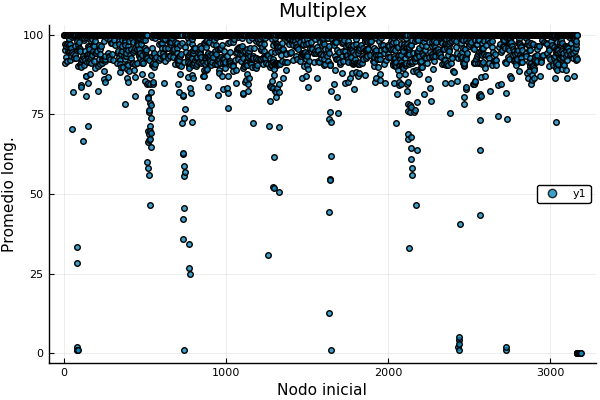

In [145]:
pyplot()
d_lpn_M = scatter(lpn_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [140]:
lpn_SA = @time walk_av_length(caminata_SA)

  1.024014 seconds (2.94 M allocations: 833.645 MiB, 7.35% gc time)


934-element Array{Any,1}:
 100.0
 100.0
  94.8
 100.0
 100.0
 100.0
 100.0
 100.0
  92.8
  94.0
 100.0
 100.0
  94.9
   ⋮  
 100.0
 100.0
 100.0
  99.5
 100.0
 100.0
  99.4
 100.0
   0.0
   0.0
   0.0
   0.0

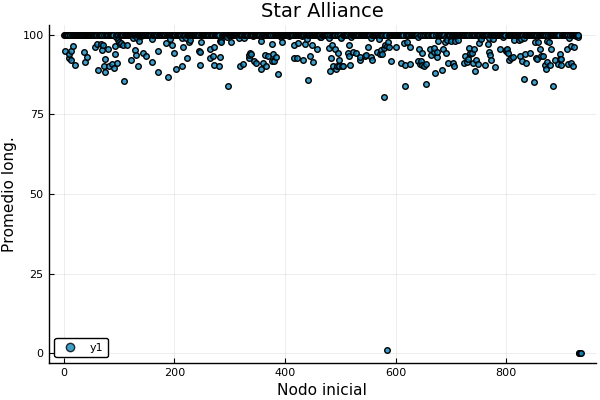

In [146]:
pyplot()
d_lpn_SA = scatter(lpn_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [141]:
lpn_OW = @time walk_av_length(caminata_OW)

  0.690697 seconds (1.86 M allocations: 540.184 MiB, 6.67% gc time)


698-element Array{Any,1}:
  86.2
 100.0
  82.5
  88.6
  98.0
  64.7
  56.8
  78.3
  92.7
  86.6
  83.0
  93.2
  80.6
   ⋮  
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

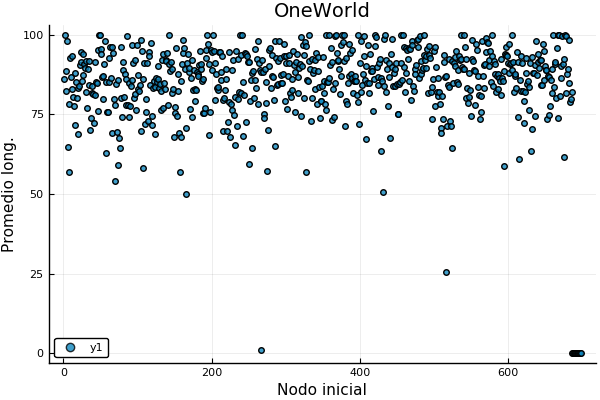

In [147]:
pyplot()
d_lpn_OW = scatter(lpn_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

In [142]:
lpn_ST = @time walk_av_length(caminata_ST)

  1.005643 seconds (2.76 M allocations: 771.015 MiB, 6.78% gc time)


900-element Array{Any,1}:
  94.4
 100.0
  89.6
  88.6
  99.0
  93.8
  95.9
  98.5
 100.0
  91.5
  93.1
  88.4
 100.0
   ⋮  
  93.6
  98.4
  83.6
  84.1
  84.4
 100.0
  89.1
 100.0
   0.0
   0.0
   0.0
   0.0

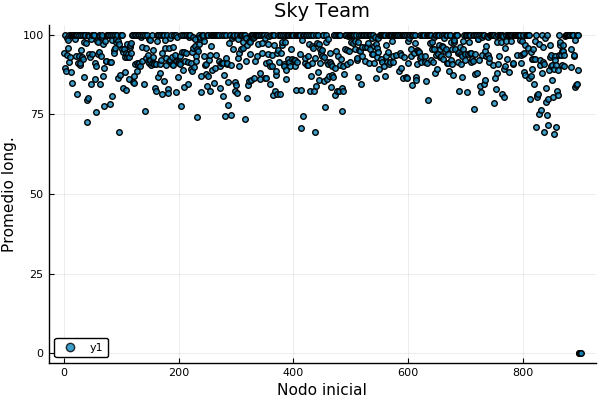

In [148]:
pyplot()
d_lpn_ST = scatter(lpn_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team", 
    xlabel="Nodo inicial", 
    ylabel="Promedio long.")

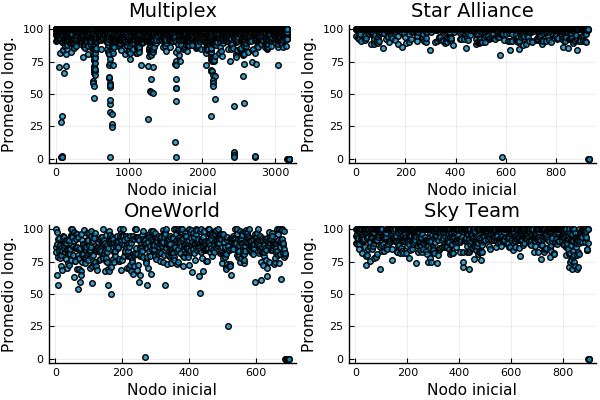

In [149]:
plot(d_lpn_M,d_lpn_SA,d_lpn_OW,d_lpn_ST,layout=(2,2),legend=false)

## Longitud promedio de caminatas por capa

In [151]:
wl_M = @time walk_layer_length(caminata_M)

  3.479546 seconds (11.08 M allocations: 2.735 GiB, 7.44% gc time)


95.31658827218567

In [152]:
wl_SA = @time walk_layer_length(caminata_SA)

  1.038717 seconds (2.94 M allocations: 833.673 MiB, 7.98% gc time)


97.73254817987154

In [153]:
wl_OW = @time walk_layer_length(caminata_OW)

  0.676441 seconds (1.87 M allocations: 540.205 MiB, 7.16% gc time)


84.46217765042978

In [154]:
wl_ST = @time walk_layer_length(caminata_ST)

  0.948443 seconds (2.76 M allocations: 771.042 MiB, 7.26% gc time)


93.6034444444445

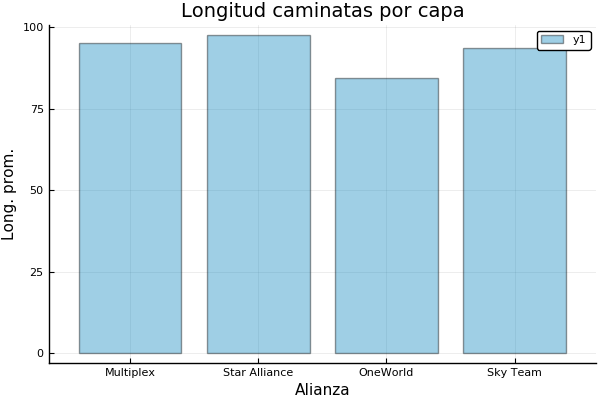

In [224]:
pyplot()
xx = ["Multiplex", "Star Alliance", "OneWorld", "Sky Team"]
yy = [wl_M, wl_SA, wl_OW, wl_ST]
d_wl = bar(xx, yy, color="#0f87bf",alpha=0.4, 
    title="Longitud caminatas por capa", 
    xlabel="Alianza", 
    ylabel="Long. prom.")
#bar!(xx[2], yy[2])
#bar!(xx[3], yy[3])
#bar!(xx[4], yy[4])

In [ ]:
#NO
pyplot()
histogram(lpn_SA, 
    nbins = 50, 
    title="Longitud promedio de caminata por nodo", 
    xlabel="Promedio por nodo", 
    ylabel="Frecuencia",
    xlims = (0, 110))
histogram!(lpn_OW, nbins=50, falpha=0.4)
histogram!(lpn_ST, nbins=50, falpha=0.3)

## Nodos visitados específicamente

In [228]:
nv_M = @time nodos_visitados(caminata_M)

  0.438736 seconds (633.79 k allocations: 206.215 MiB, 51.04% gc time)


3189-element Array{Any,1}:
 Any[[1, 727, 837, 436, 470, 1653, 154, 857, 1974, 1023  …  1939, 1937, 1938, 1347, 1346, 133, 1350, 1360, 39, 1655], [1, 1531, 130, 481, 221, 1684, 1081, 1049, 1077, 1048  …  375, 385, 1188, 123, 715, 1108, 1115, 1186, 1090, 1067], [1, 4, 14, 1728, 20, 18, 352, 724, 2408, 2738  …  2697, 1000, 714, 369, 49, 395, 2908, 224, 189, 1234], [1, 998, 1531, 727, 223, 1008, 1979, 636, 640, 1407  …  259, 726, 176, 580, 220, 661, 448, 189, 339, 1981], [1, 682, 15, 352, 2872, 470, 493, 460, 431, 183  …  684, 1851, 449, 49, 1914, 221, 1946, 471, 223, 436], [1, 2274, 2797, 728, 671, 2708, 14, 1532, 6, 1829  …  2271, 1226, 479, 1584, 1082, 228, 1481, 453, 934, 936], [1, 670, 244, 303, 2276, 19, 20, 164, 1717, 494  …  135, 439, 1993, 3001, 1233, 1989, 1519, 1988, 463, 221], [1, 837, 824, 727, 1048, 231, 1993, 1221, 1763, 496  …  1153, 338, 199, 1543, 1016, 407, 1150, 1139, 2392, 2394], [1, 837, 670, 725, 729, 4, 492, 183, 478, 58  …  727, 1150, 1190, 894, 1785, 1200, 715, 89

In [238]:
#Nodos visitados (diferentes) en cada una de las 10 iteraciones con nodo inicial 3
nv_M[3]

10-element Array{Any,1}:
 [3, 682, 1343, 1872, 183, 182, 424, 453, 1201, 1115  …  2265, 1441, 171, 1421, 2031, 172, 178, 1442, 2083, 1438]
 [3, 14, 1532, 1008, 1023, 441, 1348, 451, 136, 134  …  2059, 888, 929, 124, 1130, 2976, 410, 1450, 395, 333]    
 [3, 9, 1823, 1831, 723, 1527, 349, 3089, 347, 15  …  3076, 494, 193, 999, 1049, 2241, 470, 1568, 444, 1077]     
 [3, 9, 278, 175, 305, 1354, 633, 658, 634, 627  …  31, 600, 2644, 109, 1008, 1875, 2614, 2620, 2240, 1557]      
 [3, 9, 1226, 54, 2424, 1996, 1362, 470, 1085, 433  …  492, 225, 491, 154, 1241, 471, 1342, 494, 499, 426]       
 [3, 8, 4, 1008, 297, 2321, 2328, 564, 178, 130  …  1190, 1150, 109, 31, 30, 1130, 1099, 338, 195, 1184]         
 [3, 725, 727, 832, 71, 1226, 428, 1764, 1221, 433  …  2407, 1122, 1285, 369, 544, 1150, 1173, 467, 1023, 90]    
 [3, 478, 753, 9, 591, 594, 439, 471, 460, 223  …  2361, 195, 715, 1209, 1961, 1177, 1098, 1184, 901, 911]       
 [3, 1752, 319, 14, 425, 53, 1049, 493, 444, 189  …  129, 1480,

In [229]:
nv_SA = @time nodos_visitados(caminata_SA)

  0.088313 seconds (188.40 k allocations: 61.599 MiB, 20.54% gc time)


934-element Array{Any,1}:
 Any[[1, 3, 5, 43, 19, 68, 26, 829, 533, 2  …  511, 44, 211, 324, 374, 309, 302, 370, 384, 327], [1, 61, 40, 32, 12, 322, 19, 570, 26, 769  …  116, 111, 438, 107, 152, 84, 80, 264, 251, 284], [1, 3, 50, 11, 20, 9, 73, 60, 495, 533  …  619, 99, 638, 611, 698, 612, 106, 211, 408, 385], [1, 61, 44, 3, 53, 9, 72, 548, 838, 840  …  759, 756, 547, 517, 16, 23, 531, 98, 476, 702], [1, 3, 33, 64, 9, 754, 2, 117, 276, 430  …  537, 496, 569, 296, 301, 302, 388, 184, 167, 227], [1, 61, 37, 29, 3, 43, 62, 26, 800, 850  …  913, 559, 18, 553, 537, 19, 557, 599, 492, 322], [1, 3, 23, 69, 73, 533, 83, 60, 9, 211  …  26, 833, 599, 492, 810, 790, 349, 308, 132, 880], [1, 40, 3, 36, 46, 29, 37, 11, 451, 322  …  454, 482, 568, 811, 805, 491, 126, 367, 408, 423], [1, 40, 61, 23, 54, 50, 89, 559, 18, 174  …  860, 462, 753, 262, 504, 83, 96, 670, 250, 797], [1, 40, 32, 3, 47, 38, 60, 83, 235, 115  …  105, 89, 573, 26, 103, 475, 119, 401, 396, 930]]                                   

In [230]:
nv_OW = @time nodos_visitados(caminata_OW)

  0.055693 seconds (130.45 k allocations: 37.827 MiB, 21.56% gc time)


698-element Array{Any,1}:
 Any[[1, 85, 222, 89, 457, 155, 207, 514, 502, 508  …  236, 78, 46, 197, 336, 93, 39, 431, 696, 0], [1, 127, 232, 292, 293, 30, 265, 268, 277, 25  …  46, 10, 196, 177, 217, 241, 68, 143, 162, 205], [1, 85, 442, 89, 115, 136, 168, 66, 76, 46  …  385, 40, 177, 232, 228, 201, 233, 176, 124, 95], [1, 85, 460, 31, 453, 446, 89, 439, 437, 222  …  178, 128, 121, 93, 686, 238, 135, 61, 167, 149], [1, 3, 207, 526, 2, 236, 168, 192, 115, 19  …  178, 214, 191, 224, 46, 172, 82, 91, 688, 0], [1, 85, 127, 289, 332, 25, 213, 229, 96, 407  …  433, 460, 443, 450, 445, 441, 61, 181, 691, 0], [1, 207, 513, 504, 3, 374, 520, 508, 120, 323  …  30, 586, 258, 314, 356, 296, 354, 318, 251, 265], [1, 115, 161, 116, 469, 96, 135, 80, 3, 46  …  164, 169, 221, 168, 190, 62, 590, 292, 611, 329], [1, 135, 216, 2, 73, 96, 8, 127, 324, 305  …  82, 66, 179, 23, 103, 214, 178, 201, 397, 595], [1, 127, 292, 80, 333, 271, 121, 168, 248, 178  …  376, 62, 12, 201, 249, 135, 92, 200, 128, 172]]   

In [231]:
nv_ST = @time nodos_visitados(caminata_ST)

  0.106420 seconds (178.13 k allocations: 56.616 MiB, 18.73% gc time)


900-element Array{Any,1}:
 Any[[1, 35, 7, 25, 43, 147, 95, 193, 599, 616  …  476, 368, 469, 212, 127, 317, 182, 65, 326, 62], [1, 15, 35, 14, 43, 42, 3, 205, 73, 378  …  134, 316, 814, 793, 377, 421, 432, 103, 380, 455], [1, 35, 133, 895, 34, 7, 93, 109, 179, 73  …  330, 324, 130, 479, 115, 103, 406, 354, 274, 111], [1, 15, 2, 35, 33, 18, 31, 95, 30, 42  …  103, 435, 437, 436, 368, 41, 894, 896, 25, 45], [1, 35, 39, 26, 33, 3, 393, 95, 166, 18  …  47, 510, 49, 65, 182, 534, 336, 326, 518, 500], [1, 35, 7, 13, 33, 34, 43, 72, 95, 200  …  743, 26, 191, 2, 136, 133, 138, 108, 87, 460], [1, 35, 39, 28, 30, 95, 67, 165, 107, 788  …  420, 387, 134, 745, 782, 120, 549, 296, 900, 0], [1, 15, 2, 35, 43, 28, 30, 95, 124, 629  …  752, 132, 188, 804, 134, 747, 164, 779, 800, 815], [1, 35, 109, 168, 163, 73, 179, 123, 74, 18  …  192, 374, 120, 145, 222, 453, 427, 415, 103, 446], [1, 15, 35, 23, 40, 34, 20, 28, 95, 101  …  274, 80, 62, 721, 65, 655, 313, 526, 52, 198]]                               

## Cobertura (nodos distintos)

In [174]:
cobi_M = @time cobertura(caminata_M)

  0.315399 seconds (672.07 k allocations: 207.835 MiB, 15.85% gc time)


3189-element Array{Any,1}:
 [84, 76, 76, 85, 84, 80, 86, 83, 86, 75]
 [84, 79, 81, 86, 82, 85, 81, 83, 73, 82]
 [88, 88, 81, 86, 84, 81, 84, 82, 56, 13]
 [85, 85, 85, 86, 86, 86, 56, 75, 83, 83]
 [77, 87, 82, 80, 77, 83, 89, 79, 73, 85]
 [88, 80, 80, 91, 83, 80, 84, 86, 87, 87]
 [85, 85, 84, 80, 86, 82, 85, 82, 74, 80]
 [77, 87, 76, 81, 87, 88, 87, 84, 83, 45]
 [87, 84, 73, 88, 81, 82, 88, 84, 87, 83]
 [84, 81, 83, 81, 81, 81, 84, 82, 80, 86]
 [85, 80, 83, 73, 86, 78, 83, 78, 85, 61]
 [63, 77, 88, 84, 79, 74, 87, 76, 87, 90]
 [83, 79, 82, 75, 55, 89, 77, 73, 84, 75]
 ⋮                                       
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2,

In [175]:
#Número de nodos distintos que visita en cada iteración que se hizo con nodo inicial 3
cobi_M[3]

10-element Array{Int64,1}:
 88
 88
 81
 86
 84
 81
 84
 82
 56
 13

In [176]:
cobi_SA = @time cobertura(caminata_SA)

  0.284263 seconds (199.61 k allocations: 62.071 MiB, 73.14% gc time)


934-element Array{Any,1}:
 [68, 59, 63, 71, 73, 66, 72, 63, 72, 74]
 [67, 68, 74, 66, 72, 68, 73, 72, 61, 63]
 [70, 68, 72, 79, 70, 40, 65, 70, 72, 64]
 [66, 75, 77, 57, 68, 70, 68, 65, 70, 70]
 [69, 72, 71, 72, 71, 67, 73, 74, 68, 69]
 [57, 79, 74, 66, 72, 60, 73, 67, 69, 71]
 [65, 72, 66, 71, 69, 66, 65, 75, 70, 77]
 [68, 68, 71, 76, 64, 65, 70, 73, 66, 68]
 [67, 66, 24, 67, 61, 70, 72, 59, 67, 66]
 [66, 69, 68, 67, 68, 70, 75, 67, 71, 34]
 [63, 65, 60, 68, 67, 66, 76, 67, 64, 73]
 [68, 73, 63, 69, 68, 64, 64, 66, 72, 59]
 [62, 67, 72, 63, 74, 71, 41, 71, 76, 70]
 ⋮                                       
 [73, 71, 75, 63, 65, 67, 70, 72, 76, 71]
 [73, 71, 69, 72, 70, 67, 69, 62, 65, 72]
 [73, 75, 77, 66, 71, 76, 70, 64, 69, 71]
 [73, 55, 72, 60, 73, 48, 65, 70, 72, 67]
 [73, 70, 67, 68, 64, 63, 57, 75, 72, 65]
 [71, 70, 70, 70, 75, 74, 56, 70, 70, 72]
 [69, 68, 63, 72, 65, 73, 71, 71, 69, 69]
 [74, 68, 68, 64, 68, 71, 73, 73, 74, 75]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 

In [177]:
cobi_OW = @time cobertura(caminata_OW)

  0.058407 seconds (138.84 k allocations: 38.184 MiB, 19.96% gc time)


698-element Array{Any,1}:
 [47, 62, 61, 67, 26, 46, 57, 60, 64, 66]
 [65, 64, 61, 59, 60, 63, 61, 61, 66, 63]
 [59, 58, 58, 5, 65, 38, 57, 59, 63, 51] 
 [12, 59, 63, 53, 62, 63, 61, 62, 60, 67]
 [61, 55, 67, 64, 57, 60, 61, 63, 61, 63]
 [38, 36, 68, 56, 61, 54, 14, 4, 22, 63] 
 [63, 8, 51, 31, 64, 55, 64, 4, 4, 40]   
 [66, 55, 14, 57, 11, 65, 54, 53, 38, 63]
 [68, 58, 63, 60, 64, 65, 23, 54, 60, 64]
 [51, 64, 56, 57, 65, 53, 63, 10, 63, 59]
 [67, 62, 55, 17, 48, 65, 59, 54, 64, 15]
 [59, 60, 63, 62, 48, 61, 55, 66, 42, 64]
 [41, 62, 63, 43, 61, 54, 68, 67, 51, 5] 
 ⋮                                       
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 

In [178]:
cobi_ST = @time cobertura(caminata_ST)

  0.071879 seconds (188.94 k allocations: 57.071 MiB, 13.20% gc time)


900-element Array{Any,1}:
 [74, 69, 71, 67, 70, 65, 35, 74, 68, 64]
 [65, 67, 68, 68, 72, 73, 70, 65, 66, 74]
 [64, 43, 72, 34, 60, 59, 71, 59, 71, 66]
 [56, 54, 76, 65, 60, 67, 63, 10, 67, 70]
 [67, 67, 60, 63, 60, 70, 70, 58, 64, 64]
 [62, 62, 63, 34, 77, 62, 73, 63, 69, 75]
 [59, 53, 73, 76, 71, 66, 64, 70, 69, 58]
 [68, 63, 71, 66, 74, 69, 66, 67, 69, 54]
 [63, 71, 77, 72, 67, 63, 69, 61, 64, 61]
 [12, 69, 69, 63, 65, 69, 72, 65, 63, 63]
 [69, 64, 67, 62, 62, 64, 29, 71, 65, 65]
 [72, 18, 71, 59, 70, 69, 71, 51, 61, 66]
 [72, 64, 73, 68, 69, 73, 67, 67, 77, 63]
 ⋮                                       
 [62, 32, 63, 61, 62, 71, 64, 66, 69, 68]
 [61, 67, 60, 68, 61, 70, 68, 75, 68, 79]
 [73, 74, 31, 24, 70, 62, 68, 69, 55, 55]
 [67, 32, 61, 66, 74, 71, 65, 67, 16, 74]
 [64, 68, 61, 67, 68, 75, 17, 20, 73, 69]
 [72, 63, 72, 61, 66, 68, 69, 75, 63, 65]
 [72, 65, 64, 61, 51, 71, 68, 16, 73, 72]
 [65, 64, 64, 71, 64, 70, 64, 64, 65, 63]
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]          
 [2, 2, 

## Cobertura promedio de las caminatas de cada aeropuerto inicial

In [179]:
cobs_M = @time n_cobertura_av(caminata_M)

  0.286777 seconds (692.10 k allocations: 208.808 MiB, 18.77% gc time)


3189-element Array{Any,1}:
 81.5
 81.6
 74.3
 81.0
 81.2
 84.6
 82.3
 79.5
 83.7
 82.3
 79.2
 80.5
 77.2
  ⋮  
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

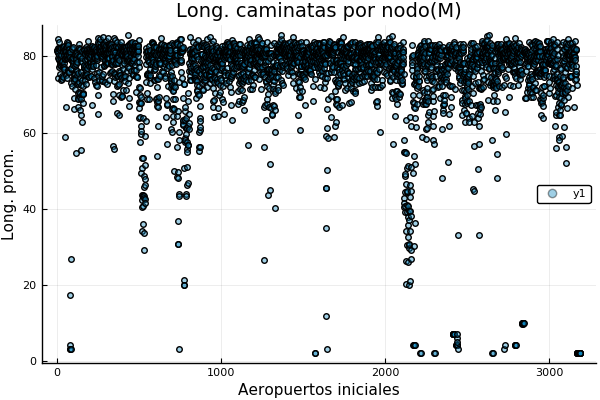

In [194]:
d_cobs_M = scatter(cobs_M, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(M)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [185]:
cobs_SA = @time n_cobertura_av(caminata_SA)

  0.270853 seconds (200.58 k allocations: 62.102 MiB, 75.87% gc time)


934-element Array{Any,1}:
 68.1
 68.4
 67.0
 68.6
 70.6
 68.8
 69.6
 68.9
 61.9
 65.5
 66.9
 66.6
 66.7
  ⋮  
 70.3
 69.0
 71.2
 65.5
 67.4
 69.8
 69.0
 70.8
  2.0
  2.0
  2.0
  2.0

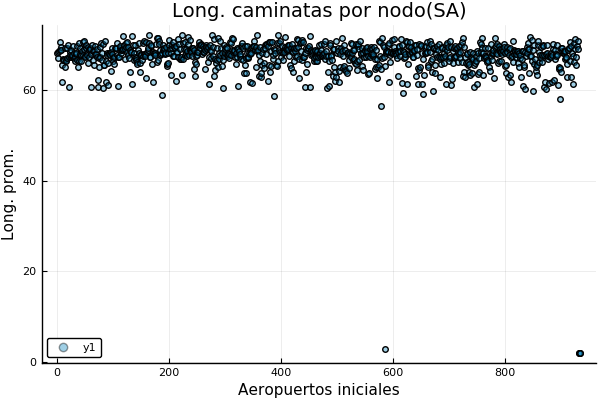

In [195]:
d_cobs_SA = scatter(cobs_SA, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(SA)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [186]:
cobs_OW = @time n_cobertura_av(caminata_OW)

  0.052525 seconds (139.55 k allocations: 38.210 MiB, 21.03% gc time)


698-element Array{Any,1}:
 55.6
 62.3
 51.3
 56.2
 61.2
 41.6
 38.4
 47.6
 57.9
 54.1
 50.6
 58.0
 51.5
  ⋮  
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

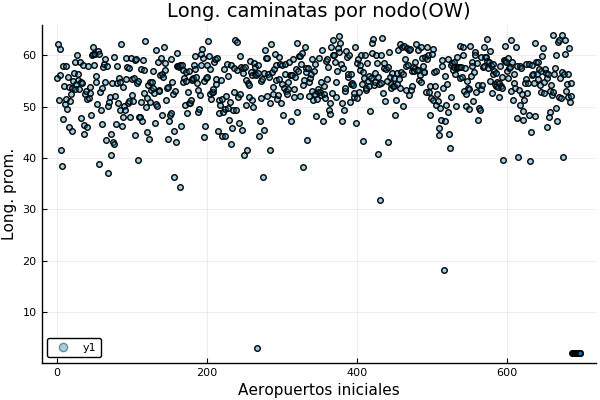

In [196]:
d_cobs_OW = scatter(cobs_OW, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(OW)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

In [187]:
cobs_ST = @time n_cobertura_av(caminata_ST)

  0.068054 seconds (189.85 k allocations: 57.101 MiB, 13.95% gc time)


900-element Array{Any,1}:
 65.7
 68.8
 59.9
 58.8
 64.3
 64.0
 65.9
 66.7
 66.8
 61.0
 61.8
 60.8
 69.3
  ⋮  
 61.8
 67.7
 58.1
 59.3
 58.2
 67.4
 61.3
 65.4
  2.0
  2.0
  2.0
  2.0

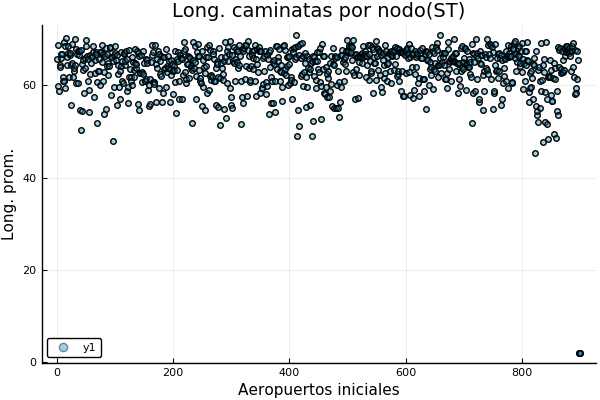

In [197]:
d_cobs_ST = scatter(cobs_ST, color="#0f87bf",alpha=0.4, 
    title="Long. caminatas por nodo(ST)", 
    xlabel="Aeropuertos iniciales", 
    ylabel="Long. prom.")

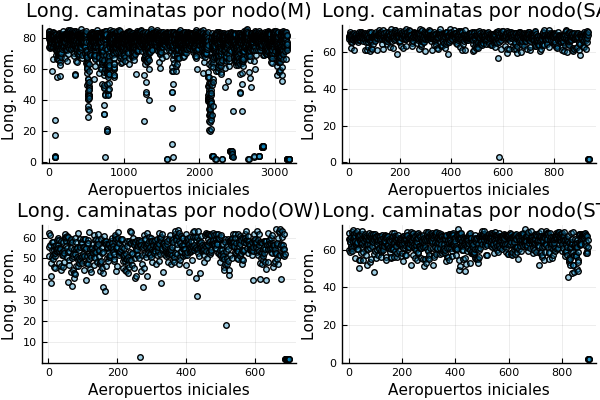

In [198]:
plot(d_cobs_M,d_cobs_SA,d_cobs_OW,d_cobs_ST,layout=(2,2),legend=false)

In [ ]:
#NO

In [ ]:
cobs_SA = @time n_cobertura_av(caminata_SA)

In [ ]:
difSA = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(dif_SA)

In [ ]:
dif_SA

In [ ]:
b = bar(dif_SA,xlim=(0,90),color="#0f87bf",alpha=0.4)

In [ ]:
dif_OW = @time n_cobertura_av(caminata_OW)

In [ ]:
difOW = histogram(dif_OW, nbins=100,title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
dif_ST = @time n_cobertura_av(caminata_ST)

In [ ]:
difST = histogram(dif_ST,nbins=100, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [ ]:
plot(difSA, difOW, difST, layout=(1,3),legend=false)

In [ ]:
difs = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
histogram!(dif_OW, falpha=0.4)
histogram!(dif_ST, falpha=0.4)

In [ ]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

In [ ]:
#Plot que en el eje x tenga cada nodo inicial (aeropuerto) y en el eje y el promedio

In [ ]:
h = bar(1:80, frqs, color="#0f87bf",align="center",alpha=0.4)

## Cobertura promedio por alianza

In [199]:
cobp_M = @time cobertura_av(caminata_M)

  0.273057 seconds (682.61 k allocations: 208.097 MiB, 18.11% gc time)


74.5142677955472

In [200]:
cobp_SA = @time cobertura_av(caminata_SA)

  0.114255 seconds (202.43 k allocations: 62.130 MiB, 43.25% gc time)


67.26167023554608

In [201]:
cobp_OW = @time cobertura_av(caminata_OW)

  0.206552 seconds (140.94 k allocations: 38.232 MiB, 79.04% gc time)


53.36604584527226

In [202]:
cobp_ST = @time cobertura_av(caminata_ST)

  0.071149 seconds (191.66 k allocations: 57.129 MiB, 11.84% gc time)


63.3695555555556

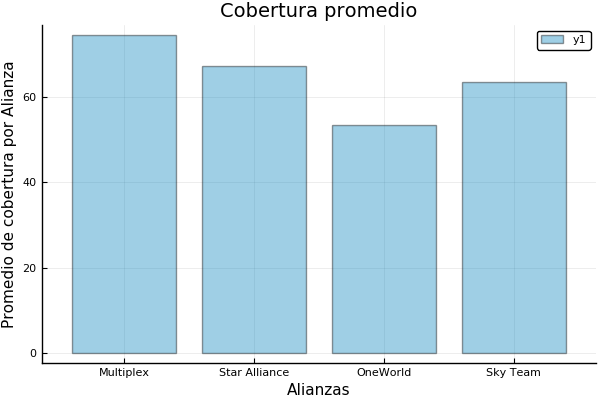

In [225]:
x = ["Multiplex", "Star Alliance", "OneWorld", "Sky Team"]
y = [cobp_M, cobp_SA, cobp_OW, cobp_ST]
b = bar(x, y,
    color="#0f87bf",
    title="Cobertura promedio",
    xlabel="Alianzas",
    ylabel = "Promedio de cobertura por Alianza", 
    alpha=0.4)

## "Atractores"

In [277]:
at_M = @time atractor(caminata_M)

  0.347045 seconds (782.27 k allocations: 212.880 MiB, 17.89% gc time)


3189-element Array{Any,1}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3175]                           
 [0, 0, 0, 0, 0, 0, 3179, 0, 0, 0]                           
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 3171, 0, 0, 0, 0, 0, 0, 0]                           
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 3186]                           
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                              
 [0, 0, 0, 0, 3188, 0, 0, 0, 0, 0]                           
 ⋮                                                           
 [3178, 3178, 3178, 3178, 3178, 3178, 3178, 3178, 3178, 3178]
 [3179, 3179, 3179, 3179, 3179, 3179, 3179,

In [278]:
at_SA = @time atractor(caminata_SA)

  0.096226 seconds (221.87 k allocations: 63.154 MiB, 19.37% gc time)


934-element Array{Any,1}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 933, 0, 0, 0, 0]                  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 934, 0, 0, 0, 0, 0, 0, 0]                  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 932]                  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 933, 0, 0, 0]                  
 ⋮                                                 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 0, 0, 932, 0, 0, 0, 0]                  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]       

In [279]:
at_OW = @time atractor(caminata_OW)

  0.061158 seconds (159.38 k allocations: 39.177 MiB, 10.00% gc time)


698-element Array{Any,1}:
 [696, 0, 0, 0, 688, 691, 0, 0, 0, 0]              
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 0, 0, 697, 0, 688, 0, 689, 0, 697]            
 [691, 0, 0, 697, 0, 0, 0, 0, 0, 0]                
 [0, 688, 0, 0, 0, 0, 0, 0, 0, 0]                  
 [689, 693, 0, 0, 0, 0, 687, 692, 696, 0]          
 [0, 691, 687, 692, 0, 693, 0, 687, 690, 691]      
 [0, 0, 697, 0, 693, 0, 0, 0, 695, 0]              
 [0, 0, 0, 0, 0, 0, 687, 0, 0, 0]                  
 [689, 0, 0, 0, 0, 690, 0, 690, 0, 0]              
 [0, 0, 0, 693, 0, 697, 0, 0, 0, 692]              
 [0, 0, 0, 0, 689, 0, 0, 0, 690, 0]                
 [690, 0, 0, 695, 0, 698, 0, 687, 0, 694]          
 ⋮                                                 
 [687, 687, 687, 687, 687, 687, 687, 687, 687, 687]
 [688, 688, 688, 688, 688, 688, 688, 688, 688, 688]
 [689, 689, 689, 689, 689, 689, 689, 689, 689, 689]
 [690, 690, 690, 690, 690, 690, 690, 690, 690, 690]
 [691, 691, 691, 691, 691, 691, 691, 6

In [280]:
at_ST = @time atractor(caminata_ST)

  0.275430 seconds (212.59 k allocations: 58.199 MiB, 74.81% gc time)


900-element Array{Any,1}:
 [0, 0, 0, 0, 0, 0, 900, 0, 0, 0]                  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [0, 900, 0, 900, 0, 0, 0, 0, 0, 0]                
 [0, 897, 0, 0, 0, 0, 0, 897, 0, 0]                
 [900, 0, 0, 0, 0, 0, 0, 0, 0, 0]                  
 [0, 0, 0, 900, 0, 0, 0, 0, 0, 0]                  
 [0, 898, 0, 0, 0, 0, 0, 0, 899, 0]                
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 897]                  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 [898, 0, 0, 0, 0, 0, 0, 0, 0, 0]                  
 [0, 0, 0, 0, 0, 0, 899, 0, 0, 0]                  
 [0, 900, 0, 0, 0, 0, 0, 899, 0, 0]                
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]                    
 ⋮                                                 
 [0, 900, 0, 899, 0, 0, 0, 0, 0, 0]                
 [0, 0, 897, 0, 0, 0, 0, 0, 0, 0]                  
 [0, 0, 898, 899, 0, 0, 0, 0, 900, 0]              
 [0, 899, 898, 0, 0, 0, 0, 0, 900, 0]              
 [0, 0, 0, 0, 0, 0, 898, 899, 0, 0]   

## Frecuencia de atractores

In [304]:
f_at_M = @time freq_atractor(caminata_M)

  0.556652 seconds (787.61 k allocations: 341.045 MiB, 51.38% gc time)


3189-element Array{Any,1}:
 Dict(0=>10)       
 Dict(0=>10)       
 Dict(0=>9,3175=>1)
 Dict(0=>9,3179=>1)
 Dict(0=>10)       
 Dict(0=>10)       
 Dict(0=>9,3171=>1)
 Dict(0=>9,3186=>1)
 Dict(0=>10)       
 Dict(0=>10)       
 Dict(0=>10)       
 Dict(0=>10)       
 Dict(0=>9,3188=>1)
 ⋮                 
 Dict(3178=>10)    
 Dict(3179=>10)    
 Dict(3180=>10)    
 Dict(3181=>10)    
 Dict(3182=>10)    
 Dict(3183=>10)    
 Dict(3184=>10)    
 Dict(3185=>10)    
 Dict(3186=>10)    
 Dict(3187=>10)    
 Dict(3188=>10)    
 Dict(3189=>10)    

In [313]:
#Frecuencia de atractores en las iteraciones de caminatas con nodo inicial 3
f_at_M[3]

Dict{Int64,Int64} with 2 entries:
  0    => 9
  3175 => 1

In [305]:
f_at_SA = @time freq_atractor(caminata_SA)

  0.099585 seconds (228.63 k allocations: 84.299 MiB, 19.45% gc time)


934-element Array{Any,1}:
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>9,933=>1)
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>9,934=>1)
 Dict(0=>9,932=>1)
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>9,933=>1)
 ⋮                
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>9,932=>1)
 Dict(0=>10)      
 Dict(0=>10)      
 Dict(0=>9,934=>1)
 Dict(0=>10)      
 Dict(931=>10)    
 Dict(932=>10)    
 Dict(933=>10)    
 Dict(934=>10)    

In [306]:
f_at_OW = @time freq_atractor(caminata_OW)

  0.087268 seconds (166.22 k allocations: 86.356 MiB, 22.73% gc time)


698-element Array{Any,1}:
 Dict(0=>7,696=>1,688=>1,691=>1)              
 Dict(0=>10)                                  
 Dict(0=>6,689=>1,688=>1,697=>2)              
 Dict(0=>8,697=>1,691=>1)                     
 Dict(0=>9,688=>1)                            
 Dict(0=>5,689=>1,692=>1,693=>1,687=>1,696=>1)
 Dict(0=>3,692=>1,693=>1,687=>2,690=>1,691=>2)
 Dict(0=>7,693=>1,695=>1,697=>1)              
 Dict(0=>9,687=>1)                            
 Dict(0=>7,689=>1,690=>2)                     
 Dict(0=>7,692=>1,693=>1,697=>1)              
 Dict(0=>8,689=>1,690=>1)                     
 Dict(0=>5,687=>1,694=>1,695=>1,698=>1,690=>1)
 ⋮                                            
 Dict(687=>10)                                
 Dict(688=>10)                                
 Dict(689=>10)                                
 Dict(690=>10)                                
 Dict(691=>10)                                
 Dict(692=>10)                                
 Dict(693=>10)                    

In [307]:
f_at_ST = @time freq_atractor(caminata_ST)

  0.144243 seconds (220.43 k allocations: 101.868 MiB, 42.59% gc time)


900-element Array{Any,1}:
 Dict(0=>9,900=>1)              
 Dict(0=>10)                    
 Dict(0=>8,900=>2)              
 Dict(0=>8,897=>2)              
 Dict(0=>9,900=>1)              
 Dict(0=>9,900=>1)              
 Dict(0=>8,898=>1,899=>1)       
 Dict(0=>9,897=>1)              
 Dict(0=>10)                    
 Dict(0=>9,898=>1)              
 Dict(0=>9,899=>1)              
 Dict(0=>8,900=>1,899=>1)       
 Dict(0=>10)                    
 ⋮                              
 Dict(0=>8,900=>1,899=>1)       
 Dict(0=>9,897=>1)              
 Dict(0=>7,900=>1,898=>1,899=>1)
 Dict(0=>7,900=>1,898=>1,899=>1)
 Dict(0=>8,898=>1,899=>1)       
 Dict(0=>10)                    
 Dict(0=>8,898=>1,899=>1)       
 Dict(0=>10)                    
 Dict(897=>10)                  
 Dict(898=>10)                  
 Dict(899=>10)                  
 Dict(900=>10)                  

## Distribución atractores

In [337]:
d_at_M = @time distrib_atractor(caminata_M)

  0.972545 seconds (17.87 M allocations: 679.624 MiB, 12.69% gc time)


3189-element Array{Int64,1}:
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
  60
 140
  83
  46
 105
  79
 165
  73
  68
  91
 113
  98

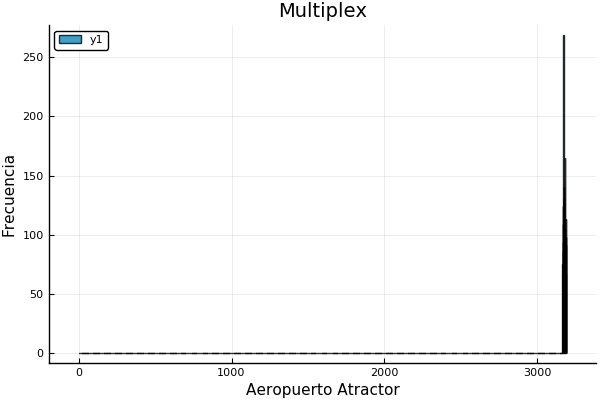

In [352]:
pyplot()
d_d_at_M = bar(d_at_M, color="#0f87bf",alpha=0.8, 
    title="Multiplex", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [338]:
d_at_SA = @time distrib_atractor(caminata_SA)

  0.205256 seconds (1.02 M allocations: 103.154 MiB, 31.18% gc time)


934-element Array{Int64,1}:
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
  20
 123
 127
 126

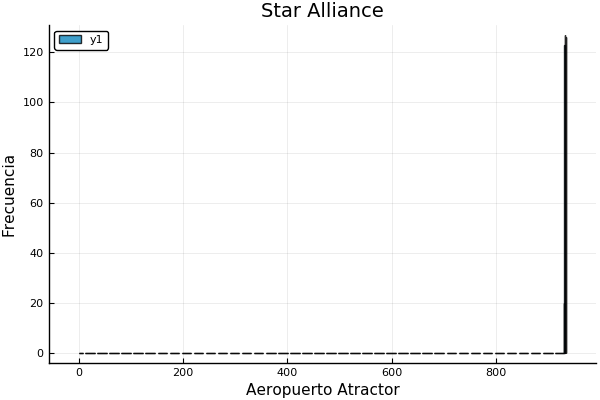

In [353]:
pyplot()
d_d_at_SA = bar(d_at_SA, color="#0f87bf",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [336]:
d_at_OW = @time distrib_atractor(caminata_OW)

  0.149602 seconds (449.89 k allocations: 95.245 MiB, 17.49% gc time)


698-element Array{Int64,1}:
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
 166
 164
 167
 276
 155
 147
 190
 134
 108
  89
 165
 170

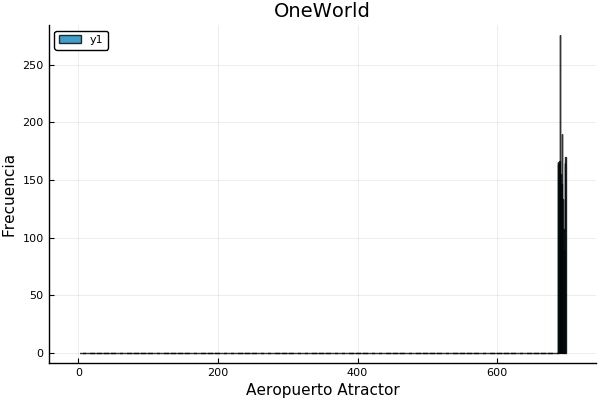

In [354]:
pyplot()
d_d_at_OW = bar(d_at_OW, color="#0f87bf",alpha=0.8, 
    title="OneWorld", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

In [339]:
d_at_ST = @time distrib_atractor(caminata_ST)

  0.333539 seconds (921.53 k allocations: 118.884 MiB, 64.98% gc time)


900-element Array{Int64,1}:
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
   0
   0
   0
   0
   0
   0
   0
   0
 140
 155
 308
 453

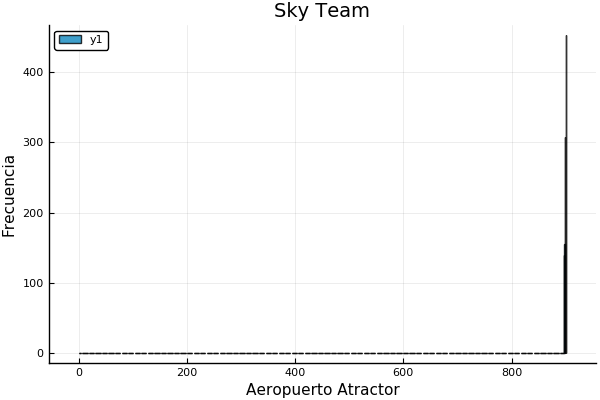

In [355]:
pyplot()
d_d_at_ST = bar(d_at_ST, color="#0f87bf",alpha=0.8, 
    title="Sky Team", 
    xlabel="Aeropuerto Atractor", 
    ylabel="Frecuencia")

### Pruebas para figurita de LANET

In [101]:
rm10 = @time random_walk(multiplex, 10, 50)

332.516333 seconds (18.53 M allocations: 39.596 GiB, 4.02% gc time)


3189-element Array{Any,1}:
 [1 2274 … 370 149; 1 9 … 4 58; … ; 1 670 … 837 232; 1 837 … 684 57]              
 [2 10 … 1830 1831; 2 4 … 827 727; … ; 2 232 … 1049 1219; 2 1829 … 224 429]       
 [3 725 … 934 254; 3 724 … 476 495; … ; 3 90 … 1196 375; 3 1752 … 3086 670]       
 [4 358 … 1946 430; 4 755 … 467 339; … ; 4 135 … 2007 438; 4 749 … 2989 136]      
 [5 9 … 594 9; 5 2408 … 2661 2677; … ; 5 9 … 55 434; 5 8 … 1371 1374]             
 [6 232 … 1049 51; 6 304 … 1734 262; … ; 6 726 … 1579 701; 6 467 … 171 723]       
 [7 1756 … 1015 1022; 7 1527 … 1170 1202; … ; 7 997 … 232 488; 7 1531 … 3022 1854]
 [8 351 … 1527 278; 8 724 … 51 1067; … ; 8 1527 … 1284 3186; 8 728 … 478 1567]    
 [9 1 … 489 195; 9 189 … 564 164; … ; 9 1533 … 996 477; 9 2738 … 726 1022]        
 [10 232 … 684 494; 10 232 … 339 1867; … ; 10 682 … 482 457; 10 4 … 727 423]      
 [11 727 … 1150 453; 11 727 … 270 319; … ; 11 724 … 327 874; 11 727 … 178 1432]   
 [12 4 … 352 15; 12 14 … 1443 1442; … ; 12 349 … 2565 149; 1

In [105]:
cm10 = cobertura_av(rm10)

9.265863907180938

In [103]:
rm20 = @time random_walk(multiplex, 20, 50)

758.455722 seconds (37.54 M allocations: 79.024 GiB, 4.28% gc time)


3189-element Array{Any,1}:
 [1 670 … 51 1081; 1 4 … 424 3078; … ; 1 2274 … 431 457; 1 724 … 90 349]      
 [2 10 … 130 996; 2 9 … 839 368; … ; 2 232 … 638 164; 2 9 … 1167 2367]        
 [3 725 … 316 326; 3 9 … 1916 49; … ; 3 478 … 228 457; 3 1752 … 580 2236]     
 [4 1234 … 53 1048; 4 1756 … 1527 20; … ; 4 2743 … 2280 339; 4 684 … 2008 231]
 [5 725 … 272 304; 5 725 … 31 30; … ; 5 759 … 1153 1955; 5 725 … 418 644]     
 [6 439 … 395 402; 6 304 … 686 278; … ; 6 15 … 223 222; 6 662 … 225 1049]     
 [7 1531 … 2596 232; 7 594 … 571 170; … ; 7 997 … 493 470; 7 1531 … 1085 227] 
 [8 728 … 1593 1215; 8 242 … 1996 50; … ; 8 3 … 161 1535; 8 423 … 1016 1120]  
 [9 54 … 1184 1205; 9 684 … 418 1413; … ; 9 2738 … 304 313; 9 594 … 594 661]  
 [10 594 … 1233 130; 10 6 … 492 494; … ; 10 232 … 222 52; 10 4 … 1015 453]    
 [11 727 … 1023 1879; 11 4 … 566 1023; … ; 11 594 … 352 2443; 11 4 … 322 318] 
 [12 594 … 2460 359; 12 349 … 683 682; … ; 12 4 … 180 1632; 12 4 … 223 661]   
 [13 352 … 464 221; 13 15

In [106]:
cm20 = cobertura_av(rm20)

17.001781122608968

In [ ]:
rm30 = @time random_walk(multiplex, 30, 50)

In [ ]:
cobertura_av(rm30)

In [ ]:
rm40 = @time random_walk(multiplex, 40, 50)

In [ ]:
cobertura_av(rm40)

In [ ]:
rm50 = @time random_walk(multiplex, 50, 50)

In [ ]:
cobertura_av(rm50)

In [ ]:
#Plot de Star Alliance. Cómo se modifica la cobertura si se cambian los pasos.
equis = [10, 20]
ye = [cm10, cm20]
scatter(equis, ye, 
    xlims = (0, 300), ylims = (0, 300),
    aspect_ratio =:equal,
    xlabel = "Pasos", ylabel = "Cobertura promedio",
    title = "Cobertura Total")

In [ ]:
a=1

In [23]:
r10 = @time random_walk(multiplexSA, 10, 20)

  2.364155 seconds (2.37 M allocations: 1.563 GiB, 8.86% gc time)


934-element Array{Any,1}:
 [1 3 … 19 574; 1 3 … 202 203; … ; 1 61 … 566 12; 1 3 … 192 176]                 
 [2 393 … 235 26; 2 748 … 26 445; … ; 2 174 … 0 0; 2 83 … 48 3]                  
 [3 19 … 535 9; 3 44 … 353 119; … ; 3 5 … 71 578; 3 68 … 557 9]                  
 [4 223 … 19 559; 4 476 … 556 19; … ; 4 476 … 464 322; 4 184 … 22 601]           
 [5 3 … 3 19; 5 3 … 16 44; … ; 5 3 … 504 26; 5 3 … 19 6]                         
 [6 71 … 539 83; 6 26 … 161 152; … ; 6 495 … 294 292; 6 55 … 280 89]             
 [7 3 … 640 295; 7 19 … 26 834; … ; 7 54 … 26 525; 7 73 … 736 2]                 
 [8 23 … 176 115; 8 23 … 43 54; … ; 8 23 … 702 476; 8 23 … 753 462]              
 [9 720 … 36 46; 9 117 … 548 26; … ; 9 754 … 92 87; 9 545 … 536 797]             
 [10 73 … 318 300; 10 54 … 743 83; … ; 10 9 … 578 506; 10 16 … 9 452]            
 [11 232 … 117 920; 11 593 … 152 101; … ; 11 50 … 19 444; 11 594 … 3 47]         
 [12 235 … 262 121; 12 528 … 111 162; … ; 12 838 … 162 129; 12 19 … 71 5

In [24]:
c10 = cobertura_av(r10)

9.283832976445398

In [25]:
r15 = @time random_walk(multiplexSA, 15, 20)

  3.420771 seconds (2.99 M allocations: 2.317 GiB, 9.25% gc time)


934-element Array{Any,1}:
 [1 3 … 576 19; 1 3 … 132 920; … ; 1 61 … 6 26; 1 3 … 119 393]                  
 [2 393 … 208 222; 2 740 … 11 460; … ; 2 552 … 12 528; 2 44 … 263 81]           
 [3 74 … 782 26; 3 35 … 934 0; … ; 3 54 … 19 87; 3 13 … 722 720]                
 [4 476 … 102 313; 4 184 … 72 6; … ; 4 476 … 184 205; 4 162 … 415 292]          
 [5 3 … 2 322; 5 3 … 162 112; … ; 5 3 … 237 203; 5 3 … 878 106]                 
 [6 73 … 310 388; 6 89 … 600 219; … ; 6 2 … 396 294; 6 80 … 119 2]              
 [7 19 … 322 473; 7 26 … 66 83; … ; 7 72 … 12 578; 7 566 … 581 26]              
 [8 23 … 387 388; 8 23 … 341 119; … ; 8 23 … 578 70; 8 23 … 83 12]              
 [9 588 … 19 574; 9 6 … 162 69; … ; 9 73 … 16 70; 9 15 … 749 2]                 
 [10 19 … 73 476; 10 72 … 83 539; … ; 10 54 … 55 174; 10 54 … 71 54]            
 [11 12 … 83 55; 11 480 … 34 3; … ; 11 594 … 700 707; 11 605 … 119 417]         
 [12 19 … 11 26; 12 26 … 73 573; … ; 12 235 … 409 392; 12 119 … 153 45]         
 [

In [26]:
c15 = cobertura_av(r15)

13.130674518201287

In [27]:
r20 = @time random_walk(multiplexSA, 20, 20)

  4.470667 seconds (3.99 M allocations: 3.091 GiB, 9.76% gc time)


934-element Array{Any,1}:
 [1 40 … 3 45; 1 40 … 9 73; … ; 1 61 … 9 758; 1 3 … 387 350]                    
 [2 558 … 45 2; 2 535 … 262 50; … ; 2 60 … 138 89; 2 576 … 406 126]             
 [3 69 … 119 340; 3 35 … 116 153; … ; 3 17 … 16 70; 3 23 … 263 279]             
 [4 223 … 106 909; 4 11 … 26 467; … ; 4 184 … 189 11; 4 11 … 73 528]            
 [5 3 … 119 332; 5 3 … 559 259; … ; 5 3 … 250 108; 5 3 … 677 528]               
 [6 70 … 678 578; 6 89 … 87 107; … ; 6 55 … 409 344; 6 96 … 9 174]              
 [7 54 … 495 737; 7 73 … 162 11; … ; 7 566 … 81 87; 7 566 … 10 54]              
 [8 23 … 838 536; 8 23 … 119 315; … ; 8 23 … 84 162; 8 23 … 117 869]            
 [9 48 … 506 504; 9 521 … 19 384; … ; 9 504 … 235 291; 9 49 … 15 62]            
 [10 73 … 2 73; 10 19 … 54 563; … ; 10 54 … 191 194; 10 19 … 115 117]           
 [11 572 … 416 414; 11 601 … 3 73; … ; 11 219 … 152 161; 11 233 … 371 838]      
 [12 62 … 754 9; 12 119 … 106 81; … ; 12 102 … 383 115; 12 61 … 162 105]        
 [

In [28]:
c20 = cobertura_av(r20)

16.828372591006424

In [29]:
r30 = @time random_walk(multiplexSA, 30, 20)

  6.652927 seconds (5.99 M allocations: 4.631 GiB, 9.97% gc time)


934-element Array{Any,1}:
 [1 61 … 9 760; 1 3 … 174 388; … ; 1 40 … 276 431; 1 40 … 19 73]                 
 [2 495 … 574 19; 2 748 … 414 304; … ; 2 290 … 537 9; 2 542 … 354 369]           
 [3 74 … 292 331; 3 54 … 106 116; … ; 3 44 … 83 718; 3 5 … 72 7]                 
 [4 162 … 370 333; 4 3 … 29 37; … ; 4 3 … 228 167; 4 3 … 0 0]                    
 [5 3 … 599 492; 5 3 … 9 758; … ; 5 3 … 26 72; 5 3 … 2 39]                       
 [6 70 … 152 163; 6 70 … 178 198; … ; 6 72 … 61 42; 6 26 … 26 805]               
 [7 20 … 248 80; 7 566 … 298 215; … ; 7 19 … 276 90; 7 20 … 184 173]             
 [8 23 … 868 84; 8 23 … 259 19; … ; 8 23 … 295 119; 8 23 … 119 476]              
 [9 552 … 418 302; 9 527 … 276 262; … ; 9 152 … 322 445; 9 752 … 398 296]        
 [10 83 … 484 322; 10 72 … 510 26; … ; 10 19 … 339 384; 10 553 … 29 3]           
 [11 50 … 45 19; 11 189 … 26 606; … ; 11 322 … 697 102; 11 50 … 120 263]         
 [12 600 … 26 473; 12 99 … 308 396; … ; 12 119 … 496 443; 12 19 … 557 26

In [30]:
c30 = cobertura_av(r30)

24.011509635974328

In [32]:
r40 = @time random_walk(multiplexSA, 40, 20)

  9.171237 seconds (7.99 M allocations: 6.164 GiB, 8.58% gc time)


934-element Array{Any,1}:
 [1 40 … 401 395; 1 61 … 880 878; … ; 1 3 … 51 62; 1 40 … 251 253]              
 [2 50 … 504 54; 2 678 … 276 263; … ; 2 26 … 416 294; 2 552 … 223 322]          
 [3 46 … 16 119; 3 68 … 60 72; … ; 3 64 … 684 690; 3 47 … 167 228]              
 [4 476 … 373 296; 4 162 … 247 267; … ; 4 19 … 262 219; 4 184 … 111 276]        
 [5 3 … 102 642; 5 3 … 16 44; … ; 5 3 … 292 336; 5 3 … 558 26]                  
 [6 495 … 511 83; 6 83 … 119 402; … ; 6 72 … 176 235; 6 70 … 117 128]           
 [7 54 … 555 54; 7 26 … 722 2; … ; 7 54 … 105 89; 7 54 … 15 11]                 
 [8 23 … 235 119; 8 23 … 174 136; … ; 8 23 … 66 62; 8 23 … 601 22]              
 [9 12 … 674 671; 9 6 … 174 217; … ; 9 578 … 18 26; 9 49 … 195 176]             
 [10 16 … 19 573; 10 19 … 292 119; … ; 10 72 … 126 55; 10 553 … 262 45]         
 [11 103 … 26 757; 11 476 … 796 26; … ; 11 514 … 194 195; 11 491 … 129 117]     
 [12 2 … 293 415; 12 322 … 198 178; … ; 12 528 … 784 26; 12 162 … 184 191]      
 [

In [33]:
c40 = cobertura_av(r40)

30.86921841541753

In [34]:
r50 = @time random_walk(multiplexSA, 50, 20)

 11.110808 seconds (9.97 M allocations: 7.690 GiB, 9.98% gc time)


934-element Array{Any,1}:
 [1 61 … 709 476; 1 40 … 327 292; … ; 1 61 … 528 679; 1 3 … 769 26]              
 [2 3 … 253 113; 2 542 … 600 103; … ; 2 9 … 296 318; 2 16 … 115 293]             
 [3 20 … 219 167; 3 74 … 215 297; … ; 3 56 … 403 296; 3 7 … 495 749]             
 [4 290 … 2 535; 4 19 … 178 234; … ; 4 26 … 54 45; 4 176 … 71 838]               
 [5 3 … 498 476; 5 3 … 282 262; … ; 5 3 … 496 443; 5 3 … 294 331]                
 [6 9 … 44 20; 6 71 … 26 514; … ; 6 11 … 457 291; 6 72 … 710 476]                
 [7 3 … 16 71; 7 73 … 9 211; … ; 7 566 … 80 282; 7 72 … 71 6]                    
 [8 23 … 607 99; 8 23 … 89 553; … ; 8 23 … 54 83; 8 23 … 187 22]                 
 [9 262 … 72 54; 9 72 … 613 298; … ; 9 573 … 290 19; 9 518 … 880 92]             
 [10 11 … 390 119; 10 3 … 26 45; … ; 10 54 … 175 178; 10 26 … 310 99]            
 [11 478 … 116 106; 11 604 … 162 88; … ; 11 187 … 11 19; 11 211 … 113 89]        
 [12 262 … 251 267; 12 115 … 134 280; … ; 12 174 … 57 62; 12 54 … 476 49

In [35]:
c50 = cobertura_av(r50)

37.436563169164906

In [36]:
r60 = @time random_walk(multiplexSA, 60, 20)

 14.274337 seconds (11.95 M allocations: 9.212 GiB, 10.23% gc time)


934-element Array{Any,1}:
 [1 40 … 26 58; 1 61 … 174 69; … ; 1 3 … 552 2; 1 61 … 499 459]                  
 [2 742 … 280 276; 2 117 … 73 70; … ; 2 542 … 689 299; 2 749 … 153 154]          
 [3 5 … 495 511; 3 495 … 318 131; … ; 3 495 … 98 117; 3 38 … 514 11]             
 [4 223 … 99 616; 4 19 … 322 448; … ; 4 162 … 93 162; 4 290 … 175 181]           
 [5 3 … 215 99; 5 3 … 102 694; … ; 5 3 … 211 19; 5 3 … 54 39]                    
 [6 11 … 102 126; 6 80 … 267 253; … ; 6 72 … 457 657; 6 72 … 162 75]             
 [7 3 … 62 23; 7 26 … 26 69; … ; 7 73 … 9 521; 7 566 … 106 432]                  
 [8 23 … 11 22; 8 23 … 53 19; … ; 8 23 … 447 656; 8 23 … 158 89]                 
 [9 53 … 178 188; 9 479 … 117 900; … ; 9 559 … 43 62; 9 495 … 467 9]             
 [10 73 … 194 195; 10 54 … 110 162; … ; 10 54 … 498 174; 10 11 … 245 276]        
 [11 514 … 320 339; 11 606 … 73 7; … ; 11 232 … 336 396; 11 601 … 162 130]       
 [12 102 … 77 152; 12 16 … 217 178; … ; 12 117 … 880 121; 12 322 … 104 2

In [37]:
c60 = cobertura_av(r60)

43.83206638115631

In [38]:
r70 = @time random_walk(multiplexSA, 70, 20)

 19.676812 seconds (13.93 M allocations: 10.733 GiB, 10.54% gc time)


934-element Array{Any,1}:
 [1 3 … 44 2; 1 61 … 276 137; … ; 1 61 … 178 190; 1 61 … 279 106]               
 [2 746 … 174 69; 2 60 … 115 26; … ; 2 26 … 3 58; 2 89 … 243 175]               
 [3 566 … 644 447; 3 68 … 476 703; … ; 3 27 … 259 80; 3 38 … 301 408]           
 [4 176 … 89 9; 4 476 … 838 19; … ; 4 184 … 115 12; 4 223 … 222 228]            
 [5 3 … 11 19; 5 3 … 26 800; … ; 5 3 … 523 9; 5 3 … 0 0]                        
 [6 235 … 72 83; 6 235 … 136 648; … ; 6 80 … 89 868; 6 71 … 176 236]            
 [7 3 … 2 6; 7 19 … 105 158; … ; 7 19 … 262 869; 7 19 … 292 363]                
 [8 23 … 26 451; 8 23 … 189 176; … ; 8 23 … 0 0; 8 23 … 26 813]                 
 [9 23 … 898 896; 9 463 … 260 80; … ; 9 89 … 504 290; 9 523 … 19 117]           
 [10 54 … 73 21; 10 19 … 838 371; … ; 10 553 … 296 119; 10 26 … 781 9]          
 [11 169 … 0 0; 11 605 … 296 364; … ; 11 26 … 2 511; 11 514 … 113 89]           
 [12 62 … 576 72; 12 2 … 106 131; … ; 12 23 … 657 447; 12 89 … 313 298]         
 [

In [39]:
c70 = cobertura_av(r70)

50.045610278372656

In [40]:
r80 = @time random_walk(multiplexSA, 80, 20)

 45.375922 seconds (15.88 M allocations: 12.237 GiB, 8.51% gc time)


934-element Array{Any,1}:
 [1 61 … 58 19; 1 40 … 106 131; … ; 1 61 … 322 474; 1 61 … 200 184]             
 [2 533 … 19 96; 2 400 … 571 512; … ; 2 26 … 700 701; 2 173 … 674 665]          
 [3 56 … 322 465; 3 26 … 332 119; … ; 3 45 … 176 296; 3 55 … 784 26]            
 [4 11 … 528 12; 4 26 … 485 455; … ; 4 162 … 474 468; 4 223 … 189 54]           
 [5 3 … 0 0; 5 3 … 308 102; … ; 5 3 … 802 26; 5 3 … 298 388]                    
 [6 54 … 608 102; 6 20 … 162 95; … ; 6 19 … 86 162; 6 71 … 641 295]             
 [7 19 … 553 454; 7 566 … 45 3; … ; 7 26 … 263 89; 7 72 … 18 26]                
 [8 23 … 83 49; 8 23 … 297 174; … ; 8 23 … 578 528; 8 23 … 520 495]             
 [9 569 … 102 99; 9 443 … 318 98; … ; 9 755 … 177 179; 9 73 … 87 117]           
 [10 83 … 152 19; 10 83 … 115 392; … ; 10 26 … 19 514; 10 54 … 319 99]          
 [11 322 … 645 656; 11 604 … 102 681; … ; 11 601 … 176 212; 11 162 … 87 879]    
 [12 495 … 903 106; 12 318 … 26 576; … ; 12 9 … 303 99; 12 152 … 235 26]        
 [

In [41]:
c80 = cobertura_av(r80)

55.918683083511795

In [42]:
r90 = @time random_walk(multiplexSA, 90, 20)

 99.671988 seconds (17.82 M allocations: 13.727 GiB, 6.33% gc time)


934-element Array{Any,1}:
 [1 40 … 762 235; 1 3 … 844 26; … ; 1 3 … 83 262; 1 3 … 522 54]                  
 [2 50 … 54 106; 2 561 … 184 223; … ; 2 20 … 290 262; 2 521 … 318 304]           
 [3 73 … 184 322; 3 25 … 418 367; … ; 3 19 … 392 406; 3 49 … 334 367]            
 [4 3 … 318 308; 4 3 … 0 0; … ; 4 26 … 116 106; 4 3 … 117 96]                    
 [5 3 … 111 19; 5 3 … 73 189; … ; 5 3 … 69 83; 5 3 … 553 454]                    
 [6 70 … 181 184; 6 89 … 0 0; … ; 6 2 … 219 322; 6 80 … 534 26]                  
 [7 19 … 536 26; 7 3 … 9 2; … ; 7 72 … 162 101; 7 20 … 588 20]                   
 [8 23 … 106 909; 8 23 … 302 331; … ; 8 23 … 505 54; 8 23 … 176 239]             
 [9 760 … 586 26; 9 781 … 20 559; … ; 9 211 … 258 80; 9 3 … 19 541]              
 [10 16 … 408 292; 10 54 … 89 903; … ; 10 72 … 451 22; 10 16 … 247 276]          
 [11 290 … 194 238; 11 460 … 632 295; … ; 11 12 … 262 20; 11 22 … 6 495]         
 [12 72 … 505 504; 12 235 … 119 106; … ; 12 600 … 87 873; 12 132 … 112 2

In [43]:
c90 = cobertura_av(r90)

61.56900428265529

In [44]:
r100 = @time random_walk(multiplexSA, 100, 20)

 68.296853 seconds (19.81 M allocations: 15.255 GiB, 6.59% gc time)


934-element Array{Any,1}:
 [1 3 … 116 87; 1 61 … 567 495; … ; 1 61 … 280 279; 1 3 … 416 296]             
 [2 9 … 11 486; 2 62 … 83 566; … ; 2 70 … 504 26; 2 719 … 119 385]             
 [3 30 … 175 19; 3 37 … 178 194; … ; 3 22 … 83 578; 3 44 … 68 3]               
 [4 290 … 54 83; 4 290 … 476 705; … ; 4 184 … 476 489; 4 290 … 99 19]          
 [5 3 … 28 3; 5 3 … 9 519; … ; 5 3 … 83 262; 5 3 … 566 3]                      
 [6 73 … 358 331; 6 9 … 232 604; … ; 6 578 … 372 296; 6 495 … 385 318]         
 [7 26 … 87 115; 7 20 … 226 231; … ; 7 73 … 111 152; 7 73 … 228 222]           
 [8 23 … 516 107; 8 23 … 83 511; … ; 8 23 … 102 608; 8 23 … 88 87]             
 [9 83 … 459 499; 9 174 … 117 84; … ; 9 262 … 102 608; 9 761 … 276 211]        
 [10 16 … 396 361; 10 3 … 429 430; … ; 10 3 … 19 573; 10 72 … 759 9]           
 [11 45 … 318 131; 11 600 … 39 54; … ; 11 529 … 789 26; 11 219 … 162 138]      
 [12 11 … 858 553; 12 102 … 119 324; … ; 12 54 … 143 151; 12 11 … 318 385]     
 [13 3 … 224 1

In [45]:
c100 = cobertura_av(r100)

67.28335117773024

In [46]:
r110 = @time random_walk(multiplexSA, 110, 20)

 87.679147 seconds (21.72 M allocations: 16.727 GiB, 6.11% gc time)


934-element Array{Any,1}:
 [1 40 … 0 0; 1 40 … 26 542; … ; 1 40 … 119 380; 1 61 … 483 486]                
 [2 533 … 76 80; 2 732 … 476 211; … ; 2 393 … 102 211; 2 73 … 447 654]          
 [3 18 … 476 322; 3 14 … 614 619; … ; 3 33 … 26 525; 3 47 … 233 177]            
 [4 26 … 367 296; 4 19 … 11 460; … ; 4 162 … 282 276; 4 3 … 83 49]              
 [5 3 … 902 117; 5 3 … 179 194; … ; 5 3 … 566 677; 5 3 … 766 174]               
 [6 578 … 296 302; 6 83 … 20 3; … ; 6 80 … 307 174; 6 11 … 529 26]              
 [7 3 … 102 211; 7 20 … 518 19; … ; 7 566 … 87 908; 7 19 … 119 403]             
 [8 23 … 819 473; 8 23 … 83 738; … ; 8 23 … 180 222; 8 23 … 15 553]             
 [9 467 … 115 100; 9 495 … 126 235; … ; 9 12 … 43 54; 9 467 … 263 92]           
 [10 11 … 26 162; 10 83 … 173 19; … ; 10 54 … 296 364; 10 11 … 279 249]         
 [11 598 … 441 117; 11 10 … 263 81; … ; 11 176 … 722 2; 11 598 … 54 575]        
 [12 322 … 50 2; 12 115 … 98 132; … ; 12 62 … 98 476; 12 578 … 4 176]           
 [

In [47]:
c110 = cobertura_av(r110)

72.56134903640248

In [48]:
r150 = @time random_walk(multiplexSA, 150, 20)

137.405311 seconds (29.38 M allocations: 22.615 GiB, 5.17% gc time)


934-element Array{Any,1}:
 [1 61 … 495 509; 1 3 … 0 0; … ; 1 40 … 217 242; 1 3 … 83 45]                    
 [2 555 … 263 113; 2 545 … 176 210; … ; 2 750 … 737 495; 2 20 … 11 592]          
 [3 48 … 891 106; 3 38 … 12 117; … ; 3 68 … 198 184; 3 37 … 26 817]              
 [4 476 … 136 457; 4 290 … 217 242; … ; 4 223 … 19 569; 4 476 … 927 300]         
 [5 3 … 0 0; 5 3 … 320 331; … ; 5 3 … 90 108; 5 3 … 152 117]                     
 [6 495 … 19 526; 6 26 … 302 292; … ; 6 11 … 9 15; 6 83 … 401 296]               
 [7 26 … 19 533; 7 26 … 9 511; … ; 7 19 … 132 84; 7 19 … 152 162]                
 [8 23 … 106 447; 8 23 … 112 54; … ; 8 23 … 282 263; 8 23 … 167 222]             
 [9 496 … 396 296; 9 11 … 23 9; … ; 9 537 … 23 61; 9 521 … 153 99]               
 [10 19 … 87 920; 10 72 … 276 261; … ; 10 54 … 720 2; 10 19 … 119 296]           
 [11 187 … 89 279; 11 43 … 176 11; … ; 11 211 … 903 106; 11 187 … 89 545]        
 [12 235 … 26 820; 12 9 … 202 184; … ; 12 2 … 54 538; 12 566 … 304 320] 

In [49]:
c150 = cobertura_av(r150)

92.43790149892946

In [50]:
r200 = @time random_walk(multiplexSA, 200, 20)

 64.011682 seconds (38.82 M allocations: 29.878 GiB, 6.35% gc time)


934-element Array{Any,1}:
 [1 40 … 100 263; 1 3 … 177 179; … ; 1 3 … 547 26; 1 61 … 115 297]              
 [2 20 … 102 136; 2 542 … 132 211; … ; 2 290 … 139 158; 2 18 … 132 81]          
 [3 11 … 43 3; 3 41 … 80 108; … ; 3 15 … 117 98; 3 36 … 295 632]                
 [4 162 … 445 26; 4 176 … 577 19; … ; 4 184 … 383 19; 4 223 … 0 0]              
 [5 3 … 505 83; 5 3 … 0 0; … ; 5 3 … 624 295; 5 3 … 18 174]                     
 [6 20 … 162 135; 6 553 … 318 153; … ; 6 20 … 26 841; 6 83 … 825 26]            
 [7 54 … 0 0; 7 73 … 903 132; … ; 7 566 … 184 228; 7 20 … 115 383]              
 [8 23 … 11 10; 8 23 … 3 12; … ; 8 23 … 276 438; 8 23 … 629 99]                 
 [9 518 … 322 448; 9 756 … 504 12; … ; 9 569 … 292 26; 9 504 … 528 16]          
 [10 9 … 411 119; 10 72 … 184 237; … ; 10 72 … 262 88; 10 26 … 698 102]         
 [11 572 … 117 131; 11 486 … 674 665; … ; 11 513 … 845 26; 11 189 … 719 2]      
 [12 115 … 54 262; 12 600 … 576 26; … ; 12 495 … 613 383; 12 26 … 219 19]       
 [

In [51]:
c200 = cobertura_av(r200)

114.62703426124197

In [52]:
r300 = @time random_walk(multiplexSA, 300, 20)

 62.790952 seconds (56.93 M allocations: 43.809 GiB, 6.90% gc time)


934-element Array{Any,1}:
 [1 3 … 227 184; 1 3 … 26 793; … ; 1 61 … 674 439; 1 3 … 235 291]             
 [2 322 … 126 348; 2 552 … 636 99; … ; 2 12 … 132 54; 2 20 … 15 263]          
 [3 45 … 771 174; 3 5 … 215 318; … ; 3 74 … 487 455; 3 14 … 262 113]          
 [4 162 … 281 276; 4 176 … 460 472; … ; 4 162 … 0 0; 4 176 … 714 194]         
 [5 3 … 495 6; 5 3 … 476 98; … ; 5 3 … 98 361; 5 3 … 372 119]                 
 [6 2 … 296 414; 6 235 … 54 70; … ; 6 71 … 74 3; 6 55 … 635 102]              
 [7 3 … 102 136; 7 19 … 636 99; … ; 7 72 … 593 11; 7 3 … 119 333]             
 [8 23 … 377 292; 8 23 … 0 0; … ; 8 23 … 353 119; 8 23 … 521 553]             
 [9 49 … 878 263; 9 519 … 414 403; … ; 9 45 … 50 73; 9 588 … 880 92]          
 [10 16 … 215 132; 10 9 … 75 89; … ; 10 73 … 223 167; 10 19 … 153 127]        
 [11 603 … 373 331; 11 54 … 126 19; … ; 11 119 … 72 67; 11 19 … 70 6]         
 [12 102 … 322 478; 12 89 … 11 119; … ; 12 70 … 518 19; 12 322 … 365 223]     
 [13 3 … 263 132; 13 15 … 

In [53]:
c300 = cobertura_av(r300)

151.49100642398275

In [54]:
r400 = @time random_walk(multiplexSA, 400, 20)

357.524171 seconds (74.55 M allocations: 57.361 GiB, 5.97% gc time)


934-element Array{Any,1}:
 [1 40 … 19 162; 1 40 … 262 924; … ; 1 3 … 0 0; 1 61 … 184 223]                  
 [2 45 … 920 87; 2 39 … 0 0; … ; 2 558 … 87 116; 2 49 … 445 443]                 
 [3 68 … 176 19; 3 37 … 495 18; … ; 3 60 … 217 178; 3 52 … 214 184]              
 [4 11 … 60 495; 4 223 … 222 178; … ; 4 476 … 0 0; 4 11 … 26 599]                
 [5 3 … 0 0; 5 3 … 429 553; … ; 5 3 … 88 117; 5 3 … 112 80]                      
 [6 54 … 0 0; 6 553 … 199 184; … ; 6 11 … 292 409; 6 553 … 66 83]                
 [7 20 … 260 276; 7 19 … 0 0; … ; 7 566 … 403 414; 7 26 … 924 117]               
 [8 23 … 3 9; 8 23 … 54 545; … ; 8 23 … 0 0; 8 23 … 666 96]                      
 [9 452 … 11 592; 9 53 … 54 7; … ; 9 69 … 523 26; 9 755 … 536 54]                
 [10 54 … 217 374; 10 72 … 89 868; … ; 10 553 … 322 174; 10 553 … 26 780]        
 [11 211 … 589 592; 11 20 … 215 235; … ; 11 232 … 511 16; 11 464 … 54 45]        
 [12 126 … 0 0; 12 566 … 749 83; … ; 12 89 … 43 11; 12 89 … 683 119]    

In [55]:
c400 = cobertura_av(r400)

182.36097430406855

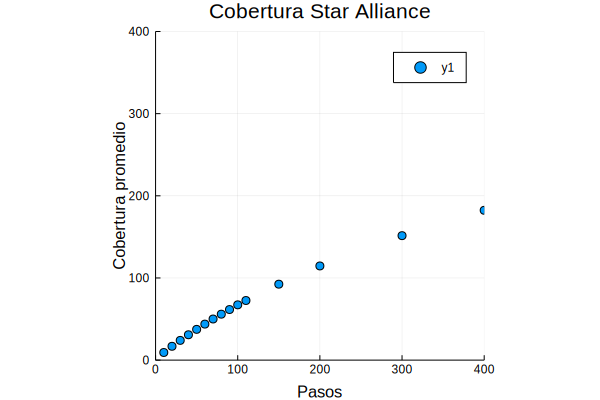

In [56]:
#Plot de Star Alliance. Cómo se modifica la cobertura si se cambian los pasos.
equis = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 150, 200, 300, 400]
ye = [c10, c20, c30, c40, c50, c60, c70, c80, c90, c100, c110, c150, c200, c300, c400]
scatter(equis, ye, 
    xlims = (0, 400), ylims = (0, 400),
    aspect_ratio =:equal,
    xlabel = "Pasos", ylabel = "Cobertura promedio",
    title = "Cobertura Star Alliance")

### Prueba histograma

In [207]:
#Matriz
d = [0 1 0
     1 0 1
     0 0 0]

3×3 Array{Int64,2}:
 0  1  0
 1  0  1
 0  0  0

In [208]:
#Caminata
rwd = random_walk(d, 3, 1)

3-element Array{Any,1}:
 [1 2 3 0]
 [2 1 2 1]
 [3 0 0 0]

In [209]:
#Obtengo una de las iteraciones
uno=rwd[3]

1×4 Array{Int64,2}:
 3  0  0  0

In [220]:
#Lista de nombres
nom_d = ["Nada", "Yuriko", "Tombo", "Sak"]

4-element Array{String,1}:
 "Nada"  
 "Yuriko"
 "Tombo" 
 "Sak"   

In [211]:
#Nombres en el orden de la caminata
while i != 0
    
    nomuno=nom_d[uno]

LoadError: syntax: incomplete: "while" at none:2 requires end

In [221]:
#Frecuencias de los números de las caminatas
his=counts(uno)

4-element Array{Int64,1}:
 3
 0
 0
 1

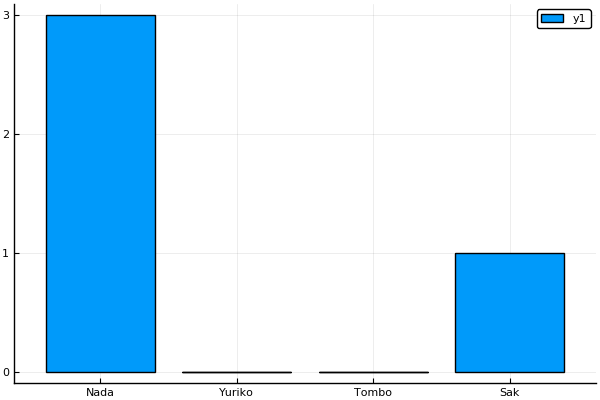

In [222]:
#Gráfica de barras de x = nombres ordenados vs. y = frecuencias
bar(nom_d,his)

In [214]:
dnan = [2 1 1
        1 2 1
        1 5 7]

3×3 Array{Int64,2}:
 2  1  1
 1  2  1
 1  5  7

In [215]:
out_degree(dnan)

1×3 Array{Int64,2}:
 4  8  9

In [216]:
as =counts(out_degree(dnan))

6-element Array{Int64,1}:
 1
 0
 0
 0
 1
 1

In [217]:
count_zeros(as)

MethodError: MethodError: no method matching count_zeros(::Array{Int64,1})
Closest candidates are:
  count_zeros(!Matched::Integer) at int.jl:397

In [ ]:
?count

In [ ]:
countmap([4,4,13])

In [218]:
rwdna = random_walk(dnan, 3, 1)

3-element Array{Any,1}:
 [1 3 1 3]
 [2 1 2 1]
 [3 2 2 1]

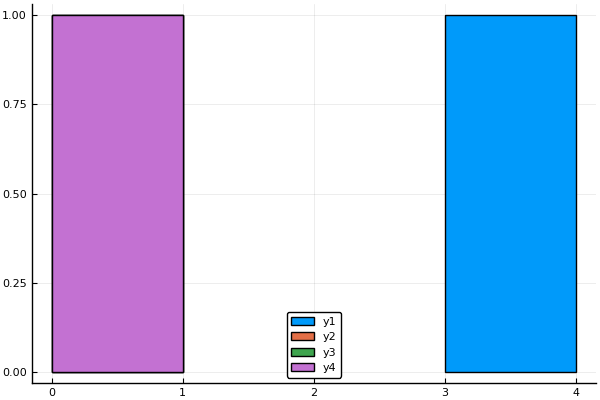

In [219]:
#Con un histograma, tenemos colores distintos y leyenda para diferenciarlos
histogram(uno)
    #legend=)
#xticks=,
#yticks=)



In [ ]:
?histogram

In [ ]:
?bar

In [ ]:
c = random_walk(multiplexST, 100, 2)


#
j = sort(c[1][1,:])
x = nombres_ST[j]
h = countmap(x)
#histogram(h)
#hh=sort(h)

oh=hcat(hh)

bar(oh)

f=freqtable(j)

l = freqtable(x)

n =names(l)

typeof(l)

#bar(l)
bar(f,
    color="#0f87bf",
    title="Título",
    xlabel="Aeropuertos",
    ylabel = "Frecuencia de visitas", 
    #xticks = names(l),
    alpha=0.4)

prueba=

k = countmap(x)


get(k, 145, "NA")

freqtable(k)

histogram()

## 

In [ ]:
get(f_at_OW[1], 2, "NA")
f_at_OW[1]
f_at_OW[3]

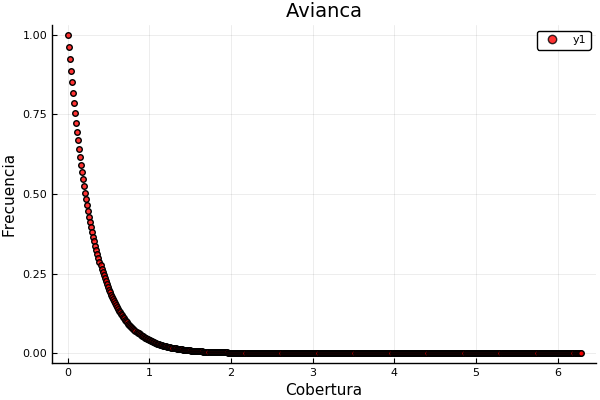

In [7]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-3*x - (0.2*x))
aa = scatter(x, y, color="red",alpha=0.8, 
    title="Avianca", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

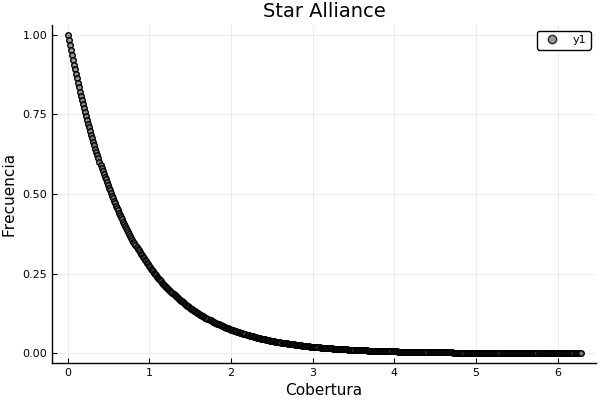

In [6]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-.7*x - (0.6*x))
bb = scatter(x, y, color="gray",alpha=0.8, 
    title="Star Alliance", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

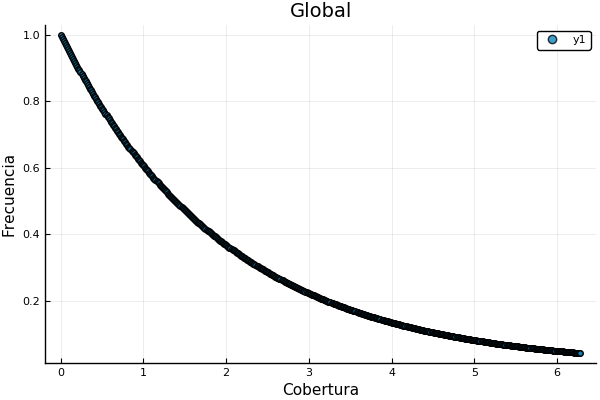

In [5]:
pyplot()
x = range(0,stop=2*pi,length=500); y = exp.(-0.50*x )
cc = scatter(x, y, color="#0f87bf",alpha=0.8, 
    title="Global", 
    xlabel="Cobertura", 
    ylabel="Frecuencia")

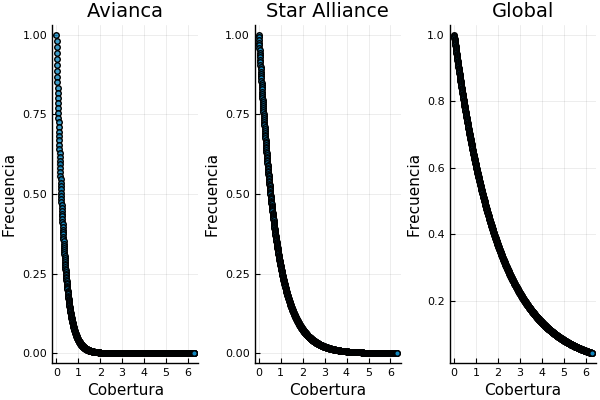

In [43]:
plot(aa,bb,cc,layout=(1,3),legend=false)